Cette partie 2 a normalement été insérée dans son entièreté dans le fichier analyse velo paris. Je la laisse ici au cas où un dérapage de souris aurait occasionné un mauvais copier coller.

# Partie 2 : Collecte et description des données météorologiques 

# A) Collecte et manipulation des données vélo

Cette partie a pour but d'expliciter les étapes suivies pour la collecte des données météorologiques. Elle s'articule autour de trois sous-parties :
1) Importation et traitement des données de comptage de vélos par sites de comptage pour chaque année, 
2) Établissement d'une liste des sites de comptage par année avec l'arrondissement correspondant, 
3) Collecte des données météorologiques (température apparente, volume des précipitations, pourcentage de couverture nuageuse) pour chaque heure de l'année pour chaque site de comptage via l'API historique d'Open-Meteo

Sur VS-Code dans Onyxia-SSP cloud, les données de comptages de vélos par sites de comptages (du style AAAA_comptage-velo-donnees-sites-comptage.csv ou AAAA-comptage-velo-donnees-sites-comptage.csv pour 2023 et 2024) étaient stockées dans un dossier "données vélo", le chemin de lecture était donc indiqué par des expressions de la forme "données vélo/2018_comptage-velo-donnees-sites-comptage.csv". Les données acquises grâce à l'API du site Open-Meteo quant à elles étaient stockées dans un dossier "données météo" sous format "2018_2024_temperature_horaire_par_site_comptage.csv" par exemple, le chemin de lecture était donc indiqué par une expression du style "données météo/2018_2024_temperature_horaire_par_site_comptage.csv". 

#  ⏰⚠️⚠️⚠️ WATCH OUT! ⚠️⚠️⚠️⏰
Cet avertissement sera réitéré au début du A) 3) mais les trois premières cellules de cette sous-partie ne sont pas destinées à être exécutées (leur lecture prend plusieurs dizaines de minutes chacune, en outre elles risquent de ne pas fonctionner en journée du fait d'un trop grand nombre de demandes). Les fichiers csv de stockage de données obtenus via l'API historique du site Open-Meteo sont disponibles sur le google drive envoyé par mail. 

## 1) Importation et traitement des données de comptage de vélos par sites de comptage pour chaque année


Étant donné que nous intéressons surtout aux noms des sites de comptage dans cette partie, (en l'occurrence ce sont par exemple les valeurs manquantes (NaN) pour les sites de comptage qui posent problème et non pas pour celles pour le comptage horaire, en outre, une autre méthode de lecture de fichiers, la méthode CSV, sera utilisé dans cette sous-partie).

In [8]:
import pandas as pd

In [9]:
# Chargement des fichiers CSV de comptage de velos par sites de comptage des années 2018 à 2024 dans des Dataframes 
# puis visualisation des premières lignes, de la liste des colonnes et de la taille de chacun des fichiers.

annees = {
    2018: ("données vélo/2018_comptage-velo-donnees-sites-comptage.csv", ";"),
    2019: ("données vélo/2019_comptage-velo-donnees-sites-comptage.csv", ";"),
    2020: ("données vélo/2020_comptage-velo-donnees-sites-comptage.csv", ";"),
    2021: ("données vélo/2021_comptage-velo-donnees-sites-comptage.csv", ";"),
    2022: ("données vélo/2022_comptage-velo-donnees-sites-comptage.csv", ";"),
    2023: ("données vélo/2023-comptage-velo-donnees-sites-comptage.csv", ","),
    2024: ("données vélo/2024-comptage-velo-donnees-sites-comptage.csv", ";"),
}

dfs = {}

for annee, (fichier, sep) in annees.items():
    dfs[annee] = pd.read_csv(fichier, sep=sep, on_bad_lines="warn")
    print(f"Données de comptage en {annee} :")
    display(dfs[annee].head())
    print("Colonnes :", dfs[annee].columns)
    print("Taille :", dfs[annee].shape)


Données de comptage en 2018 :


,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du point de comptage,Lien vers photo du point de comptage,Coordonnées géographiques
0,100041488,27 Boulevard Diderot E-O,21.0,2018-06-11T09:45:00+02:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
1,100041488,27 Boulevard Diderot E-O,4.0,2018-06-11T11:30:00+02:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
2,100041488,27 Boulevard Diderot E-O,2.0,2018-06-13T00:30:00+02:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
3,100041488,27 Boulevard Diderot E-O,0.0,2018-06-13T04:30:00+02:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
4,100041488,27 Boulevard Diderot E-O,1.0,2018-06-13T04:45:00+02:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"


Colonnes : Index(['Identifiant du point de comptage', 'Nom du point de comptage',
       'Comptage horaire', 'Date et heure de comptage',
       'Date d'installation du point de comptage',
       'Lien vers photo du point de comptage', 'Coordonnées géographiques'],
      dtype='object')
Taille : (2271177, 7)
Données de comptage en 2019 :


,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du point de comptage,Lien vers photo du point de comptage,Coordonnées géographiques
0,100003096,97 Avenue Denfert Rochereau SO-NE,8.0,2019-04-15T11:45:00+02:00,2012-02-22,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968"
1,100003096,97 Avenue Denfert Rochereau SO-NE,7.0,2019-04-16T07:30:00+02:00,2012-02-22,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968"
2,100003096,97 Avenue Denfert Rochereau SO-NE,17.0,2019-04-16T09:30:00+02:00,2012-02-22,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968"
3,100003096,97 Avenue Denfert Rochereau SO-NE,9.0,2019-04-16T12:15:00+02:00,2012-02-22,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968"
4,100003096,97 Avenue Denfert Rochereau SO-NE,9.0,2019-04-16T14:00:00+02:00,2012-02-22,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968"


Colonnes : Index(['Identifiant du point de comptage', 'Nom du point de comptage',
       'Comptage horaire', 'Date et heure de comptage',
       'Date d'installation du point de comptage',
       'Lien vers photo du point de comptage', 'Coordonnées géographiques'],
      dtype='object')
Taille : (2271305, 7)
Données de comptage en 2020 :


,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du point de comptage,Lien vers photo du point de comptage,Coordonnées géographiques
0,100044495,7 avenue de la Grande Armée NO-SE,5,2020-12-28T05:45:00+01:00,2018-07-27,https://www.eco-visio.net/Photos/100044495/153...,"48.87451,2.29215"
1,100044495,7 avenue de la Grande Armée NO-SE,3,2020-12-28T13:00:00+01:00,2018-07-27,https://www.eco-visio.net/Photos/100044495/153...,"48.87451,2.29215"
2,100044495,7 avenue de la Grande Armée NO-SE,2,2020-12-28T21:45:00+01:00,2018-07-27,https://www.eco-visio.net/Photos/100044495/153...,"48.87451,2.29215"
3,100044495,7 avenue de la Grande Armée NO-SE,8,2020-12-29T08:30:00+01:00,2018-07-27,https://www.eco-visio.net/Photos/100044495/153...,"48.87451,2.29215"
4,100044495,7 avenue de la Grande Armée NO-SE,0,2020-12-30T02:30:00+01:00,2018-07-27,https://www.eco-visio.net/Photos/100044495/153...,"48.87451,2.29215"


Colonnes : Index(['Identifiant du point de comptage', 'Nom du point de comptage',
       'Comptage horaire', 'Date et heure de comptage',
       'Date d'installation du point de comptage',
       'Lien vers photo du point de comptage', 'Coordonnées géographiques'],
      dtype='object')
Taille : (2314738, 7)
Données de comptage en 2021 :


,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Lien vers photo du point de comptage,Coordonnées géographiques
0,100003097,105 rue La Fayette E-O,0.0,2021-01-01T00:00:00,https://filer.eco-counter-tools.com/file/fb/bd...,"48.87773,2.3506"
1,100003097,105 rue La Fayette E-O,1.0,2021-01-01T00:15:00,https://filer.eco-counter-tools.com/file/fb/bd...,"48.87773,2.3506"
2,100003097,105 rue La Fayette E-O,1.0,2021-01-01T00:30:00,https://filer.eco-counter-tools.com/file/fb/bd...,"48.87773,2.3506"
3,100003097,105 rue La Fayette E-O,0.0,2021-01-01T00:45:00,https://filer.eco-counter-tools.com/file/fb/bd...,"48.87773,2.3506"
4,100003097,105 rue La Fayette E-O,2.0,2021-01-01T01:00:00,https://filer.eco-counter-tools.com/file/fb/bd...,"48.87773,2.3506"


Colonnes : Index(['Identifiant du point de comptage', 'Nom du point de comptage',
       'Comptage horaire', 'Date et heure de comptage',
       'Lien vers photo du point de comptage', 'Coordonnées géographiques'],
      dtype='object')
Taille : (5851680, 6)
Données de comptage en 2022 :


,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Lien vers photo du point de comptage,Coordonnées géographiques
0,100003096,97 avenue Denfert Rochereau,0,2022-01-01T00:00:00,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314"
1,100003096,97 avenue Denfert Rochereau,0,2022-01-01T00:15:00,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314"
2,100003096,97 avenue Denfert Rochereau,0,2022-01-01T00:30:00,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314"
3,100003096,97 avenue Denfert Rochereau,0,2022-01-01T00:45:00,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314"
4,100003096,97 avenue Denfert Rochereau,13,2022-01-01T01:00:00,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314"


Colonnes : Index(['Identifiant du point de comptage', 'Nom du point de comptage',
       'Comptage horaire', 'Date et heure de comptage',
       'Lien vers photo du point de comptage', 'Coordonnées géographiques'],
      dtype='object')
Taille : (5886720, 6)
Données de comptage en 2023 :


,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Lien vers photo du point de comptage,Coordonnées géographiques
0,100003097,105 rue La Fayette,0,2023-06-09 04:30:00.000,['https://filer.eco-counter-tools.com/file/23/...,"4.887773E1, 2.3506E0"
1,100003097,105 rue La Fayette,0,2023-04-08 09:30:00.000,['https://filer.eco-counter-tools.com/file/23/...,"4.887773E1, 2.3506E0"
2,100003097,105 rue La Fayette,0,2023-04-08 02:45:00.000,['https://filer.eco-counter-tools.com/file/23/...,"4.887773E1, 2.3506E0"
3,100003097,105 rue La Fayette,0,2023-05-26 23:30:00.000,['https://filer.eco-counter-tools.com/file/23/...,"4.887773E1, 2.3506E0"
4,100003097,105 rue La Fayette,0,2023-05-26 01:00:00.000,['https://filer.eco-counter-tools.com/file/23/...,"4.887773E1, 2.3506E0"


Colonnes : Index(['Identifiant du point de comptage', 'Nom du point de comptage',
       'Comptage horaire', 'Date et heure de comptage',
       'Lien vers photo du point de comptage', 'Coordonnées géographiques'],
      dtype='object')
Taille : (3128640, 6)
Données de comptage en 2024 :


,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Lien vers photo du point de comptage,Coordonnées géographiques
0,100003096,97 avenue Denfert Rochereau,4.0,2024-01-01 00:00:00.000 +0100,{'https://filer.eco-counter-tools.com/file/10/...,"48.83504, 2.33314"
1,100003096,97 avenue Denfert Rochereau,3.0,2024-01-01 01:00:00.000 +0100,{'https://filer.eco-counter-tools.com/file/10/...,"48.83504, 2.33314"
2,100003096,97 avenue Denfert Rochereau,15.0,2024-01-01 02:00:00.000 +0100,{'https://filer.eco-counter-tools.com/file/10/...,"48.83504, 2.33314"
3,100003096,97 avenue Denfert Rochereau,12.0,2024-01-01 03:00:00.000 +0100,{'https://filer.eco-counter-tools.com/file/10/...,"48.83504, 2.33314"
4,100003096,97 avenue Denfert Rochereau,7.0,2024-01-01 04:00:00.000 +0100,{'https://filer.eco-counter-tools.com/file/10/...,"48.83504, 2.33314"


Colonnes : Index(['Identifiant du point de comptage', 'Nom du point de comptage',
       'Comptage horaire', 'Date et heure de comptage',
       'Lien vers photo du point de comptage', 'Coordonnées géographiques'],
      dtype='object')
Taille : (2282746, 6)


In [ ]:
# Cette cellule a pour objectif de concaténer les DataFrames contenant les données par sites de comptage des fichiers CSV des années 2018 à 2024. 
# À partir de 2021, il n'y a plus de colonne "Date d'installation du point de comptage", le DataFrame concaténé contiendra donc la valeur "None" pour les années où cette information est manquante. 
# Par ailleurs, pour plus de lisibilité, toutes les valeurs de la colonne "Date et heure de comptage" (certaines années indiquant un fuseau horaire avec +01:00 ou +02:00) sont converties ou maintenues en heure locale.

import pandas as pd

# Colonnes de référence
COLONNES_REF = [
    "Identifiant du point de comptage",
    "Nom du point de comptage",
    "Comptage horaire",
    "Date et heure de comptage",
    "Date d'installation du point de comptage",
    "Lien vers photo du point de comptage",
    "Coordonnées géographiques"
]

# Fonction : lecture + normalisation + conversion heure locale
def lire_normaliser_en_heure_locale(path, sep):
    df = pd.read_csv(path, sep=sep, on_bad_lines="warn")

    # Ajout colonne manquante "Date d'installation du point de comptage" si nécessaire (notamment à partir de 2021 )
    if "Date d'installation du point de comptage" not in df.columns:
        df["Date d'installation du point de comptage"] = pd.NA

    # Ajout des autres colonnes manquantes
    for col in COLONNES_REF:
        if col not in df.columns:
            df[col] = None

    # Gestion des dates
    dates_raw = df["Date et heure de comptage"].astype(str)
    mask_fuseau = dates_raw.str.contains(r"\+|-Z", regex=True)
    dt = pd.Series(index=df.index, dtype="datetime64[ns]")

    # Dates AVEC fuseau horaire
    dt.loc[mask_fuseau] = (
        pd.to_datetime(dates_raw[mask_fuseau], utc=True, errors="coerce")
        .dt.tz_convert("Europe/Paris")
        .dt.tz_localize(None)
    )

    # Dates SANS fuseau
    dt.loc[~mask_fuseau] = (
        pd.to_datetime(dates_raw[~mask_fuseau], errors="coerce")
        .dt.tz_localize("Europe/Paris", ambiguous="NaT", nonexistent="shift_forward")
        .dt.tz_localize(None)
    )

    df["Date et heure de comptage"] = dt
    return df[COLONNES_REF]

# Dictionnaire avec année : (chemin, séparateur)
fichiers = {
    2018: ("données vélo/2018_comptage-velo-donnees-sites-comptage.csv", ";"),
    2019: ("données vélo/2019_comptage-velo-donnees-sites-comptage.csv", ";"),
    2020: ("données vélo/2020_comptage-velo-donnees-sites-comptage.csv", ";"),
    2021: ("données vélo/2021_comptage-velo-donnees-sites-comptage.csv", ";"),
    2022: ("données vélo/2022_comptage-velo-donnees-sites-comptage.csv", ";"),
    2023: ("données vélo/2023-comptage-velo-donnees-sites-comptage.csv", ","),
    2024: ("données vélo/2024-comptage-velo-donnees-sites-comptage.csv", ";")
}

# Lecture + normalisation de tous les fichiers
dfs = {}
for annee, (path, sep) in fichiers.items():
    dfs[annee] = lire_normaliser_en_heure_locale(path, sep)

# Concaténation finale
df_2018_2024 = pd.concat(dfs.values(), ignore_index=True)

# Vérification
df_2018_2024.head()


,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du point de comptage,Lien vers photo du point de comptage,Coordonnées géographiques
0,100041488,27 Boulevard Diderot E-O,21.0,2018-06-11 09:45:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
1,100041488,27 Boulevard Diderot E-O,4.0,2018-06-11 11:30:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
2,100041488,27 Boulevard Diderot E-O,2.0,2018-06-13 00:30:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
3,100041488,27 Boulevard Diderot E-O,0.0,2018-06-13 04:30:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
4,100041488,27 Boulevard Diderot E-O,1.0,2018-06-13 04:45:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"


In [11]:
# Première vérification rapide concernant la concaténation des DataFrames (test d'égalité du nombre de lignes)

# Somme des lignes des DataFrames individuels
total_lignes_individuel = sum(len(df) for df in dfs.values())

# Nombre de lignes dans le DataFrame concaténé
total_lignes_concatene = len(df_2018_2024)

print("Nombre de lignes concaténées :", total_lignes_concatene)
print("Somme des lignes individuelles :", total_lignes_individuel)
print("Concaténation a priori correcte ?", total_lignes_concatene == total_lignes_individuel)

Nombre de lignes concaténées : 24007006
Somme des lignes individuelles : 24007006
Concaténation a priori correcte ? True


In [12]:
# Visualation du nombre de valeurs potentiellement problématiques pour chaque colonne 
display(df_2018_2024.isna().sum()) 
display((df_2018_2024.isna().mean() * 100).round(2))


# Etant donné que la colonne date d'installation du point de comptage n'existe plus après 2021, il est probable qu'il y ait de très nombreuses cellules manquantes pour cette colonne 

Identifiant du point de comptage                   0
Nom du point de comptage                      174902
Comptage horaire                             2734768
Date et heure de comptage                       1732
Date d'installation du point de comptage    17324688
Lien vers photo du point de comptage          455222
Coordonnées géographiques                     174903
dtype: int64

Identifiant du point de comptage             0.00
Nom du point de comptage                     0.73
Comptage horaire                            11.39
Date et heure de comptage                    0.01
Date d'installation du point de comptage    72.17
Lien vers photo du point de comptage         1.90
Coordonnées géographiques                    0.73
dtype: float64

In [13]:
# Seconde vérification rapide concernant la concaténation des dataframes 
# (en comparant les valeurs manquantes dans le dataframe concaténé et la somme des valeurs manquantes dans les dataframes individuels pour les années 2018 à 2024)

#  Colonnes à vérifier

colonnes_a_tester = [
    "Nom du point de comptage",
    "Comptage horaire",
    "Date et heure de comptage",
    "Coordonnées géographiques"
]

# Nombre de valeurs manquantes dans le DataFrame concaténé
na_concatene = df_2018_2024[colonnes_a_tester].isna().sum()

# Nombre de valeurs manquantes dans l'ensemble des DataFrames individuels
na_individuels = (
    pd.concat([df[colonnes_a_tester] for df in dfs.values()])
    .isna()
    .sum()
)

# Comparaison des deux résultats
comparaison_na = pd.DataFrame({
    "Valeurs manquantes (concaténé)": na_concatene,
    "Valeurs manquantes (somme des DataFrames annuels)": na_individuels
})

# Colonne booléenne indiquant si les deux comptes sont identiques
comparaison_na["Égalité"] = (
    comparaison_na["Valeurs manquantes (concaténé)"]
    == comparaison_na["Valeurs manquantes (somme des DataFrames annuels)"]
)

# Affichage du tableau de comparaison
display(comparaison_na)


# Test global de cohérence
concat_ok = comparaison_na["Égalité"].all()

print(f"Concaténation a priori correcte ? {concat_ok}")

,Valeurs manquantes (concaténé),Valeurs manquantes (somme des DataFrames annuels),Égalité
Nom du point de comptage,174902,174902,True
Comptage horaire,2734768,2734768,True
Date et heure de comptage,1732,1732,True
Coordonnées géographiques,174903,174903,True


Concaténation a priori correcte ? True


In [14]:
# Le nombre de cellules manquantes pour les colonnes "Nom du point de comptage" et "Coordonnées géographiques" est très similaire (à une unité près sur plus de 22 millions de lignes !)
# Nous testons donc l'hypothèse selon laquelle si la cellule est manquante pour la colonne "Nom du point de comptage", alors elle sera également manquante pour la colonne "coordonnées géographiques"
mask_nom_manquant = df_2018_2024["Nom du point de comptage"].isna()
df_2018_2024.loc[mask_nom_manquant, "Coordonnées géographiques"].isna().value_counts()


Coordonnées géographiques
True    174902
Name: count, dtype: int64

Ce résultat montre que pour chaque ligne où le nom du point de comptage est manquant,les coordonnées géographiques le sont également. 
Pour l'identification des sites de comptage, nous utiliserons donc plutôt le nom du site de comptage car lorsque celui-ci est manquant, l'identifiant du point de comptage n'est associé à aucune coordonnée géographique (ce qui rend la collecte de données météorologiques impossible)

In [15]:
# Conversion des valeurs des coordonnées géographiques en nombres décimaux 
# (certaines sont affichées en écriture scientifique notamment pour 2023)

# Séparation temporaire (sans modification du DataFrame)
coords = df_2018_2024["Coordonnées géographiques"].astype(str).str.split(",", expand=True)

# Conversion numérique ()
lat = pd.to_numeric(coords[0], errors="coerce")
lon = pd.to_numeric(coords[1], errors="coerce")

# Reconstruction propre de la colonne "Coordonnées géographiques"
df_2018_2024["Coordonnées géographiques"] = (
    lat.astype(str)
       .where(lat.notna() & lon.notna(), pd.NA)
    + ","
    + lon.astype(str)
)


In [16]:
# Verification que le nombre de cellules manquantes n'a pas changé
df_2018_2024.isna().sum()

Identifiant du point de comptage                   0
Nom du point de comptage                      174902
Comptage horaire                             2734768
Date et heure de comptage                       1732
Date d'installation du point de comptage    17324688
Lien vers photo du point de comptage          455222
Coordonnées géographiques                     174903
dtype: int64

In [17]:
# Suppression des lignes pour lesquelles la cellule du nom de point de comtage est manquante
df_2018_2024 = df_2018_2024.dropna(subset=["Nom du point de comptage"])

In [18]:
# Vérification que la suppression de cellules manquantes a bien été effectuée
df_2018_2024.isna().sum()

Identifiant du point de comptage                   0
Nom du point de comptage                           0
Comptage horaire                             2644816
Date et heure de comptage                       1732
Date d'installation du point de comptage    17149786
Lien vers photo du point de comptage          280320
Coordonnées géographiques                          1
dtype: int64

In [19]:
# Suppression des colonnes inutiles (en l'occurence nous nous appuierons sur la colonne "Nom du point de comptage" pour identifier les différents sites de comptage,
#  donc la colonne "Identifiant du point de comptage" nous est ici inutile 
# tout comme les colonnes "Date d'installation du point de comptage","Lien vers photo du point de comptage" )

df_2018_2024 = df_2018_2024.drop(
    columns=["Identifiant du point de comptage", "Date d'installation du point de comptage","Lien vers photo du point de comptage"]
)
df_2018_2024.head()

,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques
0,27 Boulevard Diderot E-O,21.0,2018-06-11 09:45:00,"48.846099,2.375456"
1,27 Boulevard Diderot E-O,4.0,2018-06-11 11:30:00,"48.846099,2.375456"
2,27 Boulevard Diderot E-O,2.0,2018-06-13 00:30:00,"48.846099,2.375456"
3,27 Boulevard Diderot E-O,0.0,2018-06-13 04:30:00,"48.846099,2.375456"
4,27 Boulevard Diderot E-O,1.0,2018-06-13 04:45:00,"48.846099,2.375456"


In [20]:
# Séparation latitude et longitude (cela sera utile pour la collecte des données météorologiques)
df_2018_2024[['latitude', 'longitude']] = df_2018_2024['Coordonnées géographiques'].str.split(',', n=1, expand=True)

df_2018_2024.head()

,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques,latitude,longitude
0,27 Boulevard Diderot E-O,21.0,2018-06-11 09:45:00,"48.846099,2.375456",48.846099,2.375456
1,27 Boulevard Diderot E-O,4.0,2018-06-11 11:30:00,"48.846099,2.375456",48.846099,2.375456
2,27 Boulevard Diderot E-O,2.0,2018-06-13 00:30:00,"48.846099,2.375456",48.846099,2.375456
3,27 Boulevard Diderot E-O,0.0,2018-06-13 04:30:00,"48.846099,2.375456",48.846099,2.375456
4,27 Boulevard Diderot E-O,1.0,2018-06-13 04:45:00,"48.846099,2.375456",48.846099,2.375456


In [21]:
# Classement des données par nom de point de comptage puis dans une fois qu'il est réalisé par date et heure de comptage croissante
df_2018_2024_sortedbyplace = df_2018_2024.sort_values(by=["Nom du point de comptage","Date et heure de comptage"])
df_2018_2024_sortedbyplace.head()

,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques,latitude,longitude
1797180,10 avenue de la Grande Armée SE-NO,NaN,2018-01-01 00:00:00,"48.874716,2.292439",48.874716,2.292439
1684227,10 avenue de la Grande Armée SE-NO,NaN,2018-01-01 00:15:00,"48.874716,2.292439",48.874716,2.292439
1684234,10 avenue de la Grande Armée SE-NO,NaN,2018-01-01 00:30:00,"48.874716,2.292439",48.874716,2.292439
711309,10 avenue de la Grande Armée SE-NO,NaN,2018-01-01 00:45:00,"48.874716,2.292439",48.874716,2.292439
990005,10 avenue de la Grande Armée SE-NO,NaN,2018-01-01 01:00:00,"48.874716,2.292439",48.874716,2.292439


## 2) Établissement d'une liste des sites de comptage par année avec l'arrondissement correspondant

Dans cette sous-partie, nous construirons trois tableaux : 
1) le premier (à partir de la fonction sites_par_annee) montrera la liste des noms de points de comptage apparaissant dans le fichier CSV de comptage de vélos par sites de comptage de chaque année avec les coordonnées géographiques, la longitude et la latitude correspondantes
2) le deuxième (à partir de la fonction ajouter_arrondissements) montrera la liste des noms de points de comptage apparaissant dans le fichier CSV de comptage de vélos par sites de comptage de chaque année avec aussi l'arrondissement correspondant en plus des coordonnées géographiques, de la longitude et de la latitude
3) le troisième (à partir de la fonction tableau_par_arrondissement) montrera pour chaque arrondissement les coordonnées des points de comptage qui y sont situés (cela servira après la collecte des données météorologiques pour la construction de graphiques)

In [22]:
# Définition de la fonction qui retourne une liste unique de sites pour une année donnée
def sites_par_annee(df_all, annee):
    """
    Retourne un DataFrame avec 1 ligne par point de comptage
    présent l'année donnée.
    Si la colonne 'annee' n'existe pas, elle est créée automatiquement.
    """
    # Copie du DateFrame pour ne pas modifier l'original
    df = df_all.copy()

    # Création de la colonne 'annee' si elle n'existe pas
    if "annee" not in df.columns:
        df["annee"] = df["Date et heure de comptage"].dt.year

    # Filtrage pour l'année demandée
    df_year = df[df["annee"] == annee]

    cols = ["Nom du point de comptage", "Coordonnées géographiques", "latitude", "longitude"]
    
    # Elimination des doublons et classement par ordre alphabétique
    return (
        df_year[cols]
        .drop_duplicates(subset=["Nom du point de comptage"])
        .sort_values("Nom du point de comptage")
        .reset_index(drop=True)
    )


In [23]:
# Attribution des arrondissements via une jointure spatiale

# Chargement de geopandas pour manipuler des données géographiques
import geopandas as gpd

# URL du GeoJSON des arrondissements de Paris (délimitation des polygones)
url_geojson = (
    "https://opendata.paris.fr/explore/dataset/arrondissements/"
    "download/?format=geojson&timezone=Europe/Berlin&lang=fr"
)

# Lecture du GeoJSON des arrondissements et projection en EPSG:4326 (lat/lon)
gdf_arr = gpd.read_file(url_geojson).to_crs(epsg=4326)  

# Définition de la fonction pour faire une jointure spatiale entre sites et arrondissements
def ajouter_arrondissements(df_sites, gdf_arr):
    """
    Ajoute la colonne 'arrondissement' à un DataFrame de sites.
    """

    # Copie du DataFrame des sites pour ne pas modifier l’original
    df = df_sites.copy()

    # Vérification que la latitude et la longitude sont des valeurs numériques 
    df["latitude"]  = pd.to_numeric(df["latitude"], errors="coerce")
    df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

    # Suppression des lignes sans coordonnées valides
    df = df.dropna(subset=["latitude", "longitude"])

    # Création d'un GeoDataFrame à partir des coordonnées (points)
    gdf_sites = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df.longitude, df.latitude),
        crs="EPSG:4326"
    )

    # Jointure spatiale : pour chaque point, trouver l'arrondissement "within" (dans lequel il se trouve)
    gdf_joined = gpd.sjoin(
        gdf_sites,
        gdf_arr,
        how="left",
        predicate="within"
    )

    # Sélection des les colonnes utiles, tri les résultats et réinitialisation l’index
    return (
        gdf_joined[
            [
                "Nom du point de comptage",           
                "Coordonnées géographiques",         
                "latitude",                           
                "longitude",                          
                "l_ar"                                
            ]
        ]
        .rename(columns={"l_ar": "arrondissement"})      
        .sort_values("Nom du point de comptage")          
        .reset_index(drop=True)                           
    )


In [24]:
# Mise au point d'un tableau avec par arrondissement les coordonnées géographiques, la latitude, la longitude
def tableau_par_arrondissement(df_final):

    # Fonction interne pour convertir une liste en chaîne séparée par des points‑virgules
    def list_to_semicolon_str(x):
        return "; ".join(str(v) for v in x if pd.notna(v))

    # Regroupement de toutes les lignes du DateFrame qui appartiennent au même arrondissement 
    tableau = (
        df_final
        .groupby("arrondissement", dropna=False)  
        .agg({
            "Coordonnées géographiques": list_to_semicolon_str,  
            "latitude": list_to_semicolon_str,                    
            "longitude": list_to_semicolon_str                    
        })
        .reset_index()  
    )

    # Extraction numérique du numéro d'arrondissement pour ensuite les trier dans l'ordre croissant
    tableau["arr_num"] = (
        tableau["arrondissement"]
        .str.extract(r"(\d+)", expand=False)  
        .astype(float, errors="ignore")       
    )

    # Retour du tableau trié par nom d’arrondissement 
    return (
        tableau
        .sort_values("arr_num", na_position="last")  
        .drop(columns="arr_num")                     
        .reset_index(drop=True)                      
    )


In [25]:
#Affichage des trois tableaux pour chaque année 

# Affichage complet : toutes les lignes et toutes les colonnes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)

annees = range(2018, 2025)  # de 2018 à 2024 inclus

for annee in annees:
    print(f"\n Tableaux pour l'année {annee}\n")
    
    #  DataFrames des sites pour l'année
    df_sites = sites_par_annee(df_2018_2024, annee)
    print(f"Liste des noms des points de comptage avec les coordonnées géographiques, la latitude, la longitude correspondantes pour {annee} :")
    display(df_sites)
    
    # Ajout des arrondissements
    df_final = ajouter_arrondissements(df_sites, gdf_arr)
    print(f"Liste des noms des points de comptage avec les arrondissements correspondants en plus des coordonnées géographiques, de la latitude, de la longitude, pour {annee} :")
    display(df_final)
    
    # Tableau par arrondissement
    tableau_arr = tableau_par_arrondissement(df_final)
    print(f"Tableau par arrondissement des coordonnées géographiques, la latitude, la longitude des points de comptage qui y sont situés pour {annee} :")
    display(tableau_arr)

# NB. : Le point de comptage situé face au 40 Quai d'Issy est techniquement situé à l'extérieur du Boulevard périphérique et appartient à la commune d'Issy-les-Moulineaux, il est donc normal qu'aucun arrondissement correspondant ne s'affiche (à la place la cellule pour la colonne arrondissement affiche NaN )


 Tableaux pour l'année 2018

Liste des noms des points de comptage avec les coordonnées géographiques, la latitude, la longitude correspondantes pour 2018 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude
0,10 avenue de la Grande Armée SE-NO,"48.874716,2.292439",48.874716,2.292439
1,10 Bd Auguste Blanqui NE-SO,"48.830901,2.353237",48.830901,2.353237
2,100 Rue La Fayette O-E,"48.87746,2.35008",48.87746,2.35008
3,102 Bd magenta SE-NO,"48.877726,2.354926",48.877726,2.354926
4,105 Rue La Fayette E-O,"48.877667,2.350556",48.877667,2.350556
5,106 Avenue Denfert Rochereau NE-SO,"48.835143,2.333031",48.835143,2.333031
6,129 Rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301
7,132 Rue Lecourbe NE-SO,"48.84216,2.30115",48.84216,2.30115
8,135 Avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378
9,147 avenue d'Italie S-N,"48.82026,2.3592",48.82026,2.3592


Liste des noms des points de comptage avec les arrondissements correspondants en plus des coordonnées géographiques, de la latitude, de la longitude, pour 2018 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,10 avenue de la Grande Armée SE-NO,"48.874716,2.292439",48.874716,2.292439,17ème Ardt
1,10 Bd Auguste Blanqui NE-SO,"48.830901,2.353237",48.830901,2.353237,13ème Ardt
2,100 Rue La Fayette O-E,"48.87746,2.35008",48.877460,2.350080,10ème Ardt
3,102 Bd magenta SE-NO,"48.877726,2.354926",48.877726,2.354926,10ème Ardt
4,105 Rue La Fayette E-O,"48.877667,2.350556",48.877667,2.350556,10ème Ardt
5,106 Avenue Denfert Rochereau NE-SO,"48.835143,2.333031",48.835143,2.333031,14ème Ardt
6,129 Rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301000,15ème Ardt
7,132 Rue Lecourbe NE-SO,"48.84216,2.30115",48.842160,2.301150,15ème Ardt
8,135 Avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378,12ème Ardt
9,147 avenue d'Italie S-N,"48.82026,2.3592",48.820260,2.359200,13ème Ardt


Tableau par arrondissement des coordonnées géographiques, la latitude, la longitude des points de comptage qui y sont situés pour 2018 :


,arrondissement,Coordonnées géographiques,latitude,longitude
0,2ème Ardt,"48.86377,2.35096",48.86377,2.35096
1,3ème Ardt,"48.86521,2.35358",48.86521,2.35358
2,4ème Ardt,"48.85372,2.35702; 48.85735,2.35211",48.85372; 48.85735,2.35702; 2.35211
3,5ème Ardt,"48.85013,2.35423",48.85013,2.35423
4,6ème Ardt,"48.840801,2.333233",48.840801,2.333233
5,7ème Ardt,"48.86179,2.32014; 48.86288,2.31179; 48.86284,2...",48.86179; 48.86288; 48.86284; 48.86282,2.32014; 2.31179; 2.310345; 2.31061
6,8ème Ardt,"48.869831,2.307076; 48.869873,2.307419; 48.863...",48.869831; 48.869873; 48.86392; 48.86378; 48.8...,2.307076; 2.307419; 2.31988; 2.32003; 2.31444
7,10ème Ardt,"48.87746,2.35008; 48.877726,2.354926; 48.87766...",48.87746; 48.877726; 48.877667; 48.877686,2.35008; 2.354926; 2.350556; 2.3544712
8,11ème Ardt,"48.860528,2.388364; 48.86149,2.37376; 48.86077...",48.860528; 48.86149; 48.86077; 48.86155; 48.86...,2.388364; 2.37376; 2.372742; 2.37407; 2.372279
9,12ème Ardt,"48.843435,2.383378; 48.846099,2.375456; 48.846...",48.843435; 48.846099; 48.846028; 48.83848; 48....,2.383378; 2.375456; 2.375429; 2.37587; 2.38699...



 Tableaux pour l'année 2019

Liste des noms des points de comptage avec les coordonnées géographiques, la latitude, la longitude correspondantes pour 2019 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude
0,10 avenue de la Grande Armée SE-NO,"48.874716,2.292439",48.874716,2.292439
1,10 Bd Auguste Blanqui NE-SO,"48.830901,2.353237",48.830901,2.353237
2,100 Rue La Fayette O-E,"48.87746,2.35008",48.87746,2.35008
3,102 Bd magenta SE-NO,"48.877726,2.354926",48.877726,2.354926
4,105 Rue La Fayette E-O,"48.877667,2.350556",48.877667,2.350556
5,106 Avenue Denfert Rochereau NE-SO,"48.835143,2.333031",48.835143,2.333031
6,129 Rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301
7,132 Rue Lecourbe NE-SO,"48.84216,2.30115",48.84216,2.30115
8,135 Avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378
9,147 avenue d'Italie S-N,"48.82026,2.3592",48.82026,2.3592


Liste des noms des points de comptage avec les arrondissements correspondants en plus des coordonnées géographiques, de la latitude, de la longitude, pour 2019 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,10 avenue de la Grande Armée SE-NO,"48.874716,2.292439",48.874716,2.292439,17ème Ardt
1,10 Bd Auguste Blanqui NE-SO,"48.830901,2.353237",48.830901,2.353237,13ème Ardt
2,100 Rue La Fayette O-E,"48.87746,2.35008",48.877460,2.350080,10ème Ardt
3,102 Bd magenta SE-NO,"48.877726,2.354926",48.877726,2.354926,10ème Ardt
4,105 Rue La Fayette E-O,"48.877667,2.350556",48.877667,2.350556,10ème Ardt
5,106 Avenue Denfert Rochereau NE-SO,"48.835143,2.333031",48.835143,2.333031,14ème Ardt
6,129 Rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301000,15ème Ardt
7,132 Rue Lecourbe NE-SO,"48.84216,2.30115",48.842160,2.301150,15ème Ardt
8,135 Avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378,12ème Ardt
9,147 avenue d'Italie S-N,"48.82026,2.3592",48.820260,2.359200,13ème Ardt


Tableau par arrondissement des coordonnées géographiques, la latitude, la longitude des points de comptage qui y sont situés pour 2019 :


,arrondissement,Coordonnées géographiques,latitude,longitude
0,2ème Ardt,"48.86377,2.35096",48.86377,2.35096
1,3ème Ardt,"48.86521,2.35358",48.86521,2.35358
2,4ème Ardt,"48.85372,2.35702; 48.85735,2.35211",48.85372; 48.85735,2.35702; 2.35211
3,5ème Ardt,"48.85013,2.35423",48.85013,2.35423
4,6ème Ardt,"48.840801,2.333233",48.840801,2.333233
5,7ème Ardt,"48.86179,2.32014; 48.86288,2.31179; 48.86284,2...",48.86179; 48.86288; 48.86284; 48.86282,2.32014; 2.31179; 2.310345; 2.31061
6,8ème Ardt,"48.869831,2.307076; 48.869873,2.307419; 48.863...",48.869831; 48.869873; 48.86392; 48.86378; 48.8...,2.307076; 2.307419; 2.31988; 2.32003; 2.31444
7,10ème Ardt,"48.87746,2.35008; 48.877726,2.354926; 48.87766...",48.87746; 48.877726; 48.877667; 48.877686,2.35008; 2.354926; 2.350556; 2.3544712
8,11ème Ardt,"48.860528,2.388364; 48.86149,2.37376; 48.86077...",48.860528; 48.86149; 48.86077; 48.86155; 48.86...,2.388364; 2.37376; 2.372742; 2.37407; 2.372279
9,12ème Ardt,"48.843435,2.383378; 48.846099,2.375456; 48.846...",48.843435; 48.846099; 48.846028; 48.83848; 48....,2.383378; 2.375456; 2.375429; 2.37587; 2.38699...



 Tableaux pour l'année 2020

Liste des noms des points de comptage avec les coordonnées géographiques, la latitude, la longitude correspondantes pour 2020 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude
0,10 avenue de la Grande Armée SE-NO,"48.874716,2.292439",48.874716,2.292439
1,10 boulevard Auguste Blanqui NE-SO,"48.83068,2.35348",48.83068,2.35348
2,100 rue La Fayette,"48.87746,2.35008",48.87746,2.35008
3,102 boulevard de Magenta SE-NO,"48.877726,2.354926",48.877726,2.354926
4,105 rue La Fayette E-O,"48.877667,2.350556",48.877667,2.350556
5,106 avenue Denfert Rochereau NE-SO,"48.83521,2.33307",48.83521,2.33307
6,129 rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301
7,132 rue Lecourbe NE-SO,"48.84216,2.30115",48.84216,2.30115
8,135 avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378
9,147 avenue d'Italie S-N,"48.82026,2.3592",48.82026,2.3592


Liste des noms des points de comptage avec les arrondissements correspondants en plus des coordonnées géographiques, de la latitude, de la longitude, pour 2020 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,10 avenue de la Grande Armée SE-NO,"48.874716,2.292439",48.874716,2.292439,17ème Ardt
1,10 boulevard Auguste Blanqui NE-SO,"48.83068,2.35348",48.830680,2.353480,13ème Ardt
2,100 rue La Fayette,"48.87746,2.35008",48.877460,2.350080,10ème Ardt
3,102 boulevard de Magenta SE-NO,"48.877726,2.354926",48.877726,2.354926,10ème Ardt
4,105 rue La Fayette E-O,"48.877667,2.350556",48.877667,2.350556,10ème Ardt
5,106 avenue Denfert Rochereau NE-SO,"48.83521,2.33307",48.835210,2.333070,14ème Ardt
6,129 rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301000,15ème Ardt
7,132 rue Lecourbe NE-SO,"48.84216,2.30115",48.842160,2.301150,15ème Ardt
8,135 avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378,12ème Ardt
9,147 avenue d'Italie S-N,"48.82026,2.3592",48.820260,2.359200,13ème Ardt


Tableau par arrondissement des coordonnées géographiques, la latitude, la longitude des points de comptage qui y sont situés pour 2020 :


,arrondissement,Coordonnées géographiques,latitude,longitude
0,2ème Ardt,"48.86377,2.35096",48.86377,2.35096
1,3ème Ardt,"48.86521,2.35358",48.86521,2.35358
2,4ème Ardt,"48.85372,2.35702; 48.85735,2.35211",48.85372; 48.85735,2.35702; 2.35211
3,5ème Ardt,"48.851525,2.343298; 48.85013,2.35423; 48.85113...",48.851525; 48.85013; 48.851131,2.343298; 2.35423; 2.345678
4,6ème Ardt,"48.840801,2.333233",48.840801,2.333233
5,7ème Ardt,"48.86179,2.32014; 48.86284,2.310345; 48.86282,...",48.86179; 48.86284; 48.86282; 48.86288,2.32014; 2.310345; 2.31061; 2.31179
6,8ème Ardt,"48.869831,2.307076; 48.869873,2.307419; 48.863...",48.869831; 48.869873; 48.86392; 48.86378; 48.8...,2.307076; 2.307419; 2.31988; 2.32003; 2.31444
7,10ème Ardt,"48.87746,2.35008; 48.877726,2.354926; 48.87766...",48.87746; 48.877726; 48.877667; 48.877686,2.35008; 2.354926; 2.350556; 2.354471
8,11ème Ardt,"48.860528,2.388364; 48.860528,2.388364; 48.861...",48.860528; 48.860528; 48.86149; 48.86077; 48.8...,2.388364; 2.388364; 2.37376; 2.37305; 2.37407;...
9,12ème Ardt,"48.843435,2.383378; 48.846099,2.375456; 48.846...",48.843435; 48.846099; 48.846028; 48.829523; 48...,2.383378; 2.375456; 2.375429; 2.38699; 2.40055...



 Tableaux pour l'année 2021

Liste des noms des points de comptage avec les coordonnées géographiques, la latitude, la longitude correspondantes pour 2021 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude
0,10 avenue de la Grande Armée SE-NO,"48.874716,2.292439",48.874716,2.292439
1,10 boulevard Auguste Blanqui NE-SO,"48.83068,2.35348",48.83068,2.35348
2,100 rue La Fayette,"48.87813,2.3497",48.87813,2.3497
3,102 boulevard de Magenta SE-NO,"48.877726,2.354926",48.877726,2.354926
4,105 rue La Fayette E-O,"48.87773,2.3506",48.87773,2.3506
5,106 avenue Denfert Rochereau NE-SO,"48.83521,2.33307",48.83521,2.33307
6,129 rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301
7,132 rue Lecourbe NE-SO,"48.84216,2.30115",48.84216,2.30115
8,135 avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378
9,147 avenue d'Italie S-N,"48.82026,2.3592",48.82026,2.3592


Liste des noms des points de comptage avec les arrondissements correspondants en plus des coordonnées géographiques, de la latitude, de la longitude, pour 2021 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,10 avenue de la Grande Armée SE-NO,"48.874716,2.292439",48.874716,2.292439,17ème Ardt
1,10 boulevard Auguste Blanqui NE-SO,"48.83068,2.35348",48.830680,2.353480,13ème Ardt
2,100 rue La Fayette,"48.87813,2.3497",48.878130,2.349700,10ème Ardt
3,102 boulevard de Magenta SE-NO,"48.877726,2.354926",48.877726,2.354926,10ème Ardt
4,105 rue La Fayette E-O,"48.87773,2.3506",48.877730,2.350600,10ème Ardt
5,106 avenue Denfert Rochereau NE-SO,"48.83521,2.33307",48.835210,2.333070,14ème Ardt
6,129 rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301000,15ème Ardt
7,132 rue Lecourbe NE-SO,"48.84216,2.30115",48.842160,2.301150,15ème Ardt
8,135 avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378,12ème Ardt
9,147 avenue d'Italie S-N,"48.82026,2.3592",48.820260,2.359200,13ème Ardt


Tableau par arrondissement des coordonnées géographiques, la latitude, la longitude des points de comptage qui y sont situés pour 2021 :


,arrondissement,Coordonnées géographiques,latitude,longitude
0,1er Ardt,"48.8611449,2.3401251; 48.86357,2.32203",48.8611449; 48.86357,2.3401251; 2.32203
1,2ème Ardt,"48.86377,2.35096",48.86377,2.35096
2,3ème Ardt,"48.86502,2.35387",48.86502,2.35387
3,4ème Ardt,"48.85372,2.35702; 48.85735,2.35211",48.85372; 48.85735,2.35702; 2.35211
4,5ème Ardt,"48.851525,2.3432985; 48.85013,2.35423; 48.8511...",48.851525; 48.85013; 48.8511307; 48.8511307,2.3432985; 2.35423; 2.3456784; 2.3456784
5,6ème Ardt,"48.840801,2.333233",48.840801,2.333233
6,7ème Ardt,"48.86179,2.32014; 48.86284,2.310345; 48.86282,...",48.86179; 48.86284; 48.86282; 48.86288,2.32014; 2.310345; 2.31061; 2.31179
7,8ème Ardt,"48.869831,2.307076; 48.869873,2.307419; 48.863...",48.869831; 48.869873; 48.86373; 48.86378; 48.8...,2.307076; 2.307419; 2.31973; 2.32003; 2.31444
8,10ème Ardt,"48.87813,2.3497; 48.877726,2.354926; 48.87773,...",48.87813; 48.877726; 48.87773; 48.87756,2.3497; 2.354926; 2.3506; 2.35535
9,11ème Ardt,"48.860528,2.388364; 48.860528,2.388364; 48.861...",48.860528; 48.860528; 48.86149; 48.86077; 48.8...,2.388364; 2.388364; 2.37376; 2.37305; 2.37407;...



 Tableaux pour l'année 2022

Liste des noms des points de comptage avec les coordonnées géographiques, la latitude, la longitude correspondantes pour 2022 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude
0,10 avenue de la Grande Armée,"48.8748,2.2924",48.8748,2.2924
1,10 boulevard Auguste Blanqui,"48.83082,2.35317",48.83082,2.35317
2,100 rue La Fayette,"48.87813,2.3497",48.87813,2.3497
3,102 boulevard de Magenta,"48.87769,2.35475",48.87769,2.35475
4,105 rue La Fayette,"48.87773,2.3506",48.87773,2.3506
5,106 avenue Denfert Rochereau,"48.83505,2.33333",48.83505,2.33333
6,129 rue Lecourbe,"48.84222,2.30102",48.84222,2.30102
7,132 rue Lecourbe,"48.84209,2.30115",48.84209,2.30115
8,135 avenue Daumesnil,"48.843435,2.383378",48.843435,2.383378
9,147 avenue d'Italie,"48.82009,2.3588",48.82009,2.3588


Liste des noms des points de comptage avec les arrondissements correspondants en plus des coordonnées géographiques, de la latitude, de la longitude, pour 2022 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,10 avenue de la Grande Armée,"48.8748,2.2924",48.874800,2.292400,17ème Ardt
1,10 boulevard Auguste Blanqui,"48.83082,2.35317",48.830820,2.353170,13ème Ardt
2,100 rue La Fayette,"48.87813,2.3497",48.878130,2.349700,10ème Ardt
3,102 boulevard de Magenta,"48.87769,2.35475",48.877690,2.354750,10ème Ardt
4,105 rue La Fayette,"48.87773,2.3506",48.877730,2.350600,10ème Ardt
5,106 avenue Denfert Rochereau,"48.83505,2.33333",48.835050,2.333330,14ème Ardt
6,129 rue Lecourbe,"48.84222,2.30102",48.842220,2.301020,15ème Ardt
7,132 rue Lecourbe,"48.84209,2.30115",48.842090,2.301150,15ème Ardt
8,135 avenue Daumesnil,"48.843435,2.383378",48.843435,2.383378,12ème Ardt
9,147 avenue d'Italie,"48.82009,2.3588",48.820090,2.358800,13ème Ardt


Tableau par arrondissement des coordonnées géographiques, la latitude, la longitude des points de comptage qui y sont situés pour 2022 :


,arrondissement,Coordonnées géographiques,latitude,longitude
0,1er Ardt,"48.8611449,2.3401251; 48.8635,2.32239",48.8611449; 48.8635,2.3401251; 2.32239
1,2ème Ardt,"48.86377,2.35096",48.86377,2.35096
2,3ème Ardt,"48.86502,2.35387",48.86502,2.35387
3,4ème Ardt,"48.85372,2.35702; 48.85735,2.35211",48.85372; 48.85735,2.35702; 2.35211
4,5ème Ardt,"48.851525,2.3432985; 48.85013,2.35423; 48.8511...",48.851525; 48.85013; 48.8511307; 48.8511307,2.3432985; 2.35423; 2.3456784; 2.3456784
5,7ème Ardt,"48.86179,2.32014; 48.84641,2.31524; 48.86279,2...",48.86179; 48.84641; 48.86279; 48.8629,2.32014; 2.31524; 2.31055; 2.3118
6,8ème Ardt,"48.86999,2.30722; 48.86999,2.30743; 48.86373,2...",48.86999; 48.86999; 48.86373; 48.86462,2.30722; 2.30743; 2.31973; 2.31444
7,10ème Ardt,"48.87813,2.3497; 48.87769,2.35475; 48.87773,2....",48.87813; 48.87769; 48.87773; 48.87756,2.3497; 2.35475; 2.3506; 2.35535
8,11ème Ardt,"48.860528,2.388364; 48.86149,2.37376; 48.86077...",48.860528; 48.86149; 48.86077; 48.86155; 48.86...,2.388364; 2.37376; 2.37305; 2.37407; 2.372279
9,12ème Ardt,"48.843435,2.383378; 48.846099,2.375456; 48.846...",48.843435; 48.846099; 48.84613; 48.8295233; 48...,2.383378; 2.375456; 2.37559; 2.38699; 2.400550...



 Tableaux pour l'année 2023

Liste des noms des points de comptage avec les coordonnées géographiques, la latitude, la longitude correspondantes pour 2023 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude
0,10 avenue de la Grande Armée,"48.8748,2.2924",48.8748,2.2924
1,10 boulevard Auguste Blanqui,"48.83082,2.35317",48.83082,2.35317
2,100 rue La Fayette,"48.87813,2.3497",48.87813,2.3497
3,102 boulevard de Magenta,"48.87769,2.35475",48.87769,2.35475
4,105 rue La Fayette,"48.87773,2.3506",48.87773,2.3506
5,106 avenue Denfert Rochereau,"48.83507,2.33305",48.83507,2.33305
6,12 avenue de la Porte de Bagnolet,"48.86477122456223,2.410723865032196",48.86477122456223,2.410723865032196
7,124 boulevard MacDonald,"48.8989463,2.3807214",48.8989463,2.3807214
8,129 rue Lecourbe,"48.84222,2.30102",48.84222,2.30102
9,132 rue Lecourbe,"48.84209,2.30115",48.84209,2.30115


Liste des noms des points de comptage avec les arrondissements correspondants en plus des coordonnées géographiques, de la latitude, de la longitude, pour 2023 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,10 avenue de la Grande Armée,"48.8748,2.2924",48.874800,2.292400,17ème Ardt
1,10 boulevard Auguste Blanqui,"48.83082,2.35317",48.830820,2.353170,13ème Ardt
2,100 rue La Fayette,"48.87813,2.3497",48.878130,2.349700,10ème Ardt
3,102 boulevard de Magenta,"48.87769,2.35475",48.877690,2.354750,10ème Ardt
4,105 rue La Fayette,"48.87773,2.3506",48.877730,2.350600,10ème Ardt
5,106 avenue Denfert Rochereau,"48.83507,2.33305",48.835070,2.333050,14ème Ardt
6,12 avenue de la Porte de Bagnolet,"48.86477122456223,2.410723865032196",48.864771,2.410724,20ème Ardt
7,124 boulevard MacDonald,"48.8989463,2.3807214",48.898946,2.380721,19ème Ardt
8,129 rue Lecourbe,"48.84222,2.30102",48.842220,2.301020,15ème Ardt
9,132 rue Lecourbe,"48.84209,2.30115",48.842090,2.301150,15ème Ardt


Tableau par arrondissement des coordonnées géographiques, la latitude, la longitude des points de comptage qui y sont situés pour 2023 :


,arrondissement,Coordonnées géographiques,latitude,longitude
0,1er Ardt,"48.8611449,2.3401251; 48.8635,2.32239",48.8611449; 48.8635,2.3401251; 2.32239
1,2ème Ardt,"48.86377,2.35096",48.86377,2.35096
2,3ème Ardt,"48.86502,2.35387",48.86502,2.35387
3,4ème Ardt,"48.85372,2.35702; 48.85735,2.35211",48.85372; 48.85735,2.35702; 2.35211
4,5ème Ardt,"48.851525,2.3432985; 48.85013,2.35423; 48.8511...",48.851525; 48.85013; 48.8511307; 48.8511307,2.3432985; 2.35423; 2.3456784; 2.3456784
5,7ème Ardt,"48.86179,2.32014; 48.84641,2.31524; 48.86281,2...",48.86179; 48.84641; 48.86281; 48.8629,2.32014; 2.31524; 2.31037; 2.3118
6,8ème Ardt,"48.86999,2.30722; 48.86999,2.30743; 48.86373,2...",48.86999; 48.86999; 48.86373; 48.86462,2.30722; 2.30743; 2.31973; 2.31444
7,10ème Ardt,"48.87813,2.3497; 48.87769,2.35475; 48.87773,2....",48.87813; 48.87769; 48.87773; 48.87756,2.3497; 2.35475; 2.3506; 2.35535
8,11ème Ardt,"48.860528,2.388364; 48.86149,2.37376; 48.86077...",48.860528; 48.86149; 48.86077; 48.86155; 48.86...,2.388364; 2.37376; 2.37305; 2.37407; 2.372279;...
9,12ème Ardt,"48.843435,2.383378; 48.846099,2.375456; 48.846...",48.843435; 48.846099; 48.84613; 48.84021097191...,2.383378; 2.375456; 2.37559; 2.409219145774841...



 Tableaux pour l'année 2024

Liste des noms des points de comptage avec les coordonnées géographiques, la latitude, la longitude correspondantes pour 2024 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude
0,10 boulevard Auguste Blanqui,"48.83082,2.35317",48.83082,2.35317
1,102 boulevard de Magenta,"48.87769,2.35475",48.87769,2.35475
2,106 avenue Denfert Rochereau,"48.83507,2.33305",48.83507,2.33305
3,129 rue Lecourbe,"48.84222,2.30102",48.84222,2.30102
4,132 rue Lecourbe,"48.84209,2.30115",48.84209,2.30115
5,135 avenue Daumesnil,"48.843435,2.383378",48.843435,2.383378
6,147 avenue d'Italie,"48.82009,2.3588",48.82009,2.3588
7,152 boulevard du Montparnasse,"48.84017,2.33438",48.84017,2.33438
8,16 avenue de la Porte des Ternes,"48.88156,2.28122",48.88156,2.28122
9,163 boulevard Brune,"48.8242369,2.3212187",48.8242369,2.3212187


Liste des noms des points de comptage avec les arrondissements correspondants en plus des coordonnées géographiques, de la latitude, de la longitude, pour 2024 :


,Nom du point de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,10 boulevard Auguste Blanqui,"48.83082,2.35317",48.830820,2.353170,13ème Ardt
1,102 boulevard de Magenta,"48.87769,2.35475",48.877690,2.354750,10ème Ardt
2,106 avenue Denfert Rochereau,"48.83507,2.33305",48.835070,2.333050,14ème Ardt
3,129 rue Lecourbe,"48.84222,2.30102",48.842220,2.301020,15ème Ardt
4,132 rue Lecourbe,"48.84209,2.30115",48.842090,2.301150,15ème Ardt
5,135 avenue Daumesnil,"48.843435,2.383378",48.843435,2.383378,12ème Ardt
6,147 avenue d'Italie,"48.82009,2.3588",48.820090,2.358800,13ème Ardt
7,152 boulevard du Montparnasse,"48.84017,2.33438",48.840170,2.334380,14ème Ardt
8,16 avenue de la Porte des Ternes,"48.88156,2.28122",48.881560,2.281220,17ème Ardt
9,163 boulevard Brune,"48.8242369,2.3212187",48.824237,2.321219,14ème Ardt


Tableau par arrondissement des coordonnées géographiques, la latitude, la longitude des points de comptage qui y sont situés pour 2024 :


,arrondissement,Coordonnées géographiques,latitude,longitude
0,1er Ardt,"48.8635,2.32239",48.8635,2.32239
1,2ème Ardt,"48.86377,2.35096",48.86377,2.35096
2,3ème Ardt,"48.86502,2.35387",48.86502,2.35387
3,4ème Ardt,"48.85372,2.35702; 48.85735,2.35211",48.85372; 48.85735,2.35702; 2.35211
4,5ème Ardt,"48.85013,2.35423",48.85013,2.35423
5,7ème Ardt,"48.86179,2.32014; 48.86279,2.31055; 48.86281,2...",48.86179; 48.86279; 48.86281; 48.8629,2.32014; 2.31055; 2.31037; 2.3118
6,8ème Ardt,"48.86999,2.30722; 48.86999,2.30743; 48.86373,2...",48.86999; 48.86999; 48.86373; 48.86462,2.30722; 2.30743; 2.31973; 2.31444
7,10ème Ardt,"48.87769,2.35475; 48.87756,2.35535",48.87769; 48.87756,2.35475; 2.35535
8,11ème Ardt,"48.860528,2.388364; 48.86149,2.37376; 48.86081...",48.860528; 48.86149; 48.86081; 48.86155; 48.86089,2.388364; 2.37376; 2.37301; 2.37407; 2.37212
9,12ème Ardt,"48.843435,2.383378; 48.846099,2.375456; 48.846...",48.843435; 48.846099; 48.84613; 48.8402; 48.83...,2.383378; 2.375456; 2.37559; 2.40889; 2.405282...


# 3) Collecte des données météorologiques (température apparente, volume des précipitations, pourcentage de couverture nuageuse) pour chaque heure de l'année pour chaque site de comptage via l'API historique d'Open-Meteo

Cette sous-partie a pour but de montrer comment nous sommes parvenus à collecter de 2018 à 2024, pour chaque heure de l'année, la température apparente en degrés celsius (température apparente qui dépend également de la force du vent, des radiations solaires et de l'humidité), les volumes de précipitations en mm, la couverture nuageuse en pourcentage pour chaque site de comptage.
Nous avons choisi ces trois indicateurs car ils nous paraissaient à première vue comme ceux qui pouvaient avoir le plus d'impact sur la circulation en vélos.
Nous avons collecté nos données sur le site open-meteo.com (https://open‑meteo.com) (données sous licence CC B.Y 4.0, c'est-à-dire librement copiables, redistribuables, réutilisables et modifiables si attribution appropriée).
Nous nous sommes aussi basé sur les acquis de la sous-partie précédente (notamment pour avoir la liste des noms de points de comptage, leur coordonnées géographiques, leur longitude, leur latitude pour chaque année).

#  ⏰⚠️⚠️⚠️ WATCH OUT! ⚠️⚠️⚠️⏰
Les trois premières cellules de cette sous-partie ne sont pas destinées à être exécutées (leur lecture prend plusieurs dizaines de minutes chacune, en outre elles risquent de ne pas fonctionner en journée du fait d'un trop grand nombre de demandes). Elles détaillent la manière dont les fichiers csv qui renseignent sur la température apparente, les volumes de précipitations et la couverture nuageuse par site de comptage pour chaque heure de chaque année ont été obtenus. Ces fichiers sont consultables sur le google drive envoyé par mail. 

In [ ]:
#  ⏰⚠️⚠️⚠️ WATCH OUT! ⚠️⚠️⚠️⏰
# Ne pas exécuter ce code (cela prend plusieurs dizaines de minutes, et il peut ne pas marcher en journée lorsque l'API du site est submergé de demandes)
# Au vu de la longeur du code, nous avons dans un premier temps été contraint d'essayer de l'effectuer 7 fois mais à chaque fois pour une année différente (et non directement pour l'ensemble de la période)
# Dans ce cas la seule modification à effectuer est de changer YEARS = range (2018,  2025) en YEARS = [2018] et de changer le nom du futur fichier csv

import requests
import pandas as pd
import os
import time

# Préparation des sites avec arrondissements
df_sites_final = df_2018_2024.copy()

# Sécurité : colonne arrondissement optionnelle
if 'arrondissement' not in df_sites_final.columns:
    df_sites_final['arrondissement'] = pd.NA

# S’assurer que latitude/longitude sont numériques
df_sites_final['latitude'] = pd.to_numeric(df_sites_final['latitude'], errors='coerce')
df_sites_final['longitude'] = pd.to_numeric(df_sites_final['longitude'], errors='coerce')

#  Ajout de la colonne 'annee' si elle n’existe pas déjà
#   On l’extrait de la colonne "Date et heure de comptage" pour permettre le filtrage par année.
if "annee" not in df_sites_final.columns:
    df_sites_final["annee"] = pd.to_datetime(
        df_sites_final["Date et heure de comptage"],
        errors="coerce"
    ).dt.year

# Paramètres généraux pour l'API

YEARS = range(2018, 2025)  # 2018 → 2024
results_temp = []
DELAY_BETWEEN_REQUESTS = 1.0  # en secondes

# Dossier de sauvegarde
output_dir = "données météo"
os.makedirs(output_dir, exist_ok=True)
csv_path = os.path.join(output_dir, "2018_2024_temperature_horaire_par_site_comptage.csv")

# Boucle sur les années

for annee in YEARS:
    print(f"\n📅 Traitement de l'année {annee}")
    start_date = f"{annee}-01-01"
    end_date   = f"{annee}-12-31"

    # Filtrer les sites présents pour cette année
    df_sites_year = (
        df_sites_final[df_sites_final["annee"] == annee]
        [["Nom du point de comptage", "arrondissement", "latitude", "longitude"]]
        .drop_duplicates(subset=["Nom du point de comptage"])
        .dropna(subset=["latitude", "longitude"])
        .reset_index(drop=True)
    )

    print(f"➡️ {len(df_sites_year)} sites à traiter")

    # Boucle sur les sites de l’année
    for _, row in df_sites_year.iterrows():
        nom_site = row["Nom du point de comptage"]
        arr      = row["arrondissement"]
        lat      = float(row["latitude"])
        lon      = float(row["longitude"])

        print(f"   📡 {nom_site}")

        try:
            # URL d’appel à l’API Open‑Meteo pour les données historiques
            url = (
                "https://archive-api.open-meteo.com/v1/archive?"
                f"latitude={lat}&longitude={lon}"
                f"&start_date={start_date}&end_date={end_date}"
                "&hourly=apparent_temperature"
                "&timezone=Europe/Paris"
            )

            resp = requests.get(url, timeout=30)
            resp.raise_for_status()
            data = resp.json()

            if "hourly" not in data:
                continue

            heures = data["hourly"].get("time", [])
            temps  = data["hourly"].get("apparent_temperature", [])

            # Ajout des lignes pour chaque heure dans la liste results_temp
            for dt, temp in zip(heures, temps):
                results_temp.append({
                    "nom_point_comptage": nom_site,
                    "arrondissement": arr,
                    "latitude": lat,
                    "longitude": lon,
                    "datetime": dt,
                    "temperature_apparente": temp
                })

        except Exception as e:
            print(f"❌ Erreur pour {nom_site} ({lat},{lon}) : {e}")

        # Pause entre les requêtes pour ne pas saturer l’API
        time.sleep(DELAY_BETWEEN_REQUESTS)


# Création du DataFrame final

df_temp_horaire = pd.DataFrame(results_temp)

# Conversion de "datetime" en format datetime
df_temp_horaire["datetime"] = pd.to_datetime(
    df_temp_horaire["datetime"],
    errors="coerce"
)

# Tri chronologique : année → nom de point → datetime
df_temp_horaire["annee"] = df_temp_horaire["datetime"].dt.year
df_temp_horaire = df_temp_horaire.sort_values(
    by=["annee", "nom_point_comptage", "datetime"]
).reset_index(drop=True)

# Suppression de la colonne temporaire "annee"
df_temp_horaire = df_temp_horaire.drop(columns=["annee"])

# Sauvegarde locale du fichier CSV

df_temp_horaire.to_csv(csv_path, index=False)
print(f"\n✅ Données sauvegardées dans {csv_path}")

# Aperçu du résultat

with pd.option_context('display.max_columns', None, 'display.width', None):
    print(df_temp_horaire.head(5))



📅 Traitement de l'année 2018
➡️ 63 sites à traiter
   📡 27 Boulevard Diderot E-O
   📡 28 Boulevard Diderot
   📡 39 Quai François Mauriac
   📡 18 quai de l'hotel de ville
   📡 Face au 48 quai de la marne
   📡 77 Bd Richard Lenoir N-S
   📡 Face 104 Rue d'Aubervilliers
   📡 180 Avenue d'Italie N-S
   📡 44 avenue des Champs Elysées SE-NO
   📡 129 Rue Lecourbe SO-NE
   📡 face au 40 Quai D'Issy
   📡 Pont de Bercy
   📡 36 Quai de Grenelle
   📡 102 Bd magenta SE-NO
   📡 26 Boulevard de Ménilmontant SE-NO
   📡 Pont du Garigliano NO-SE
   📡 Face au 16 Avenue de la  Porte des Ternes O-E
   📡 21 Boulevard Auguste Blanqui SO-NE
   📡 Pont du Garigliano SE-NO
   📡 147 avenue d'Italie S-N
   📡 33 avenue des Champs Elysées NO-SE
   📡 38 rue Turbigo
   📡 135 Avenue Daumesnil SE-NO
   📡 100 Rue La Fayette O-E
   📡 105 Rue La Fayette E-O
   📡 97 Avenue Denfert Rochereau SO-NE
   📡 106 Avenue Denfert Rochereau NE-SO
   📡 16 Avenue de la Porte des Ternes E-O
   📡 132 Rue Lecourbe NE-SO
   📡 face au 8 avenu

In [ ]:
#  ⏰⚠️⚠️⚠️ WATCH OUT! ⚠️⚠️⚠️⏰
# Ne pas exécuter ce code (cela prend plusieurs dizaines de minutes, et il peut ne pas marcher en journée lorsque l'API du site est submergé de demandes)
# Au vu de la longeur du code, nous avons dans un premier temps été contraint d'essayer de l'effectuer 7 fois mais à chaque fois pour une année différente (et non directement pour l'ensemble de la période)
# Dans ce cas la seule modification à effectuer est de changer YEARS = range (2018,  2025) en YEARS = [2018] et de changer le nom du futur fichier csv


import requests
import pandas as pd
import os
import time

# Préparation des sites avec arrondissements
df_sites_final = df_2018_2024.copy()

# Sécurité : colonne arrondissement optionnelle
if 'arrondissement' not in df_sites_final.columns:
    df_sites_final['arrondissement'] = pd.NA

df_sites_final['latitude'] = pd.to_numeric(df_sites_final['latitude'], errors='coerce')
df_sites_final['longitude'] = pd.to_numeric(df_sites_final['longitude'], errors='coerce')

#  Ajout de la colonne 'annee' si elle n’existe pas déjà
#   On l’extrait de la colonne "Date et heure de comptage" pour permettre le filtrage par année.
if "annee" not in df_sites_final.columns:
    df_sites_final["annee"] = pd.to_datetime(
        df_sites_final["Date et heure de comptage"],
        errors="coerce"
    ).dt.year
 
# Paramètres généraux pour l'API

YEARS = range(2018, 2025)  # 2018 → 2024
results_precip = []
DELAY_BETWEEN_REQUESTS = 1.0  # en secondes

output_dir = "données météo"
os.makedirs(output_dir, exist_ok=True)
csv_path = os.path.join(output_dir, "2018_2024_precipitation_horaire_par_site_comptage.csv")

# Boucle sur les années

for annee in YEARS:
    print(f"\n📅 Traitement de l'année {annee}")
    start_date = f"{annee}-01-01"
    end_date   = f"{annee}-12-31"

    df_sites_year = (
        df_sites_final[df_sites_final["annee"] == annee]
        [["Nom du point de comptage", "arrondissement", "latitude", "longitude"]]
        .drop_duplicates(subset=["Nom du point de comptage"])
        .dropna(subset=["latitude", "longitude"])
        .reset_index(drop=True)
    )

    print(f"➡️ {len(df_sites_year)} sites à traiter")

    for _, row in df_sites_year.iterrows():
        nom_site = row["Nom du point de comptage"]
        arr      = row["arrondissement"]
        lat      = float(row["latitude"])
        lon      = float(row["longitude"])

        print(f"   🌧️ {nom_site}")

        try:
            url = (
                "https://archive-api.open-meteo.com/v1/archive?"
                f"latitude={lat}&longitude={lon}"
                f"&start_date={start_date}&end_date={end_date}"
                "&hourly=precipitation"
                "&timezone=Europe/Paris"
            )

            resp = requests.get(url, timeout=30)
            resp.raise_for_status()
            data = resp.json()

            if "hourly" not in data:
                continue

            heures = data["hourly"].get("time", [])
            prec   = data["hourly"].get("precipitation", [])

            for dt, p in zip(heures, prec):
                results_precip.append({
                    "nom_point_comptage": nom_site,
                    "arrondissement": arr,
                    "latitude": lat,
                    "longitude": lon,
                    "datetime": dt,
                    "precipitation_mm": p
                })

        except Exception as e:
            print(f"❌ Erreur pour {nom_site} ({lat},{lon}) : {e}")

        time.sleep(DELAY_BETWEEN_REQUESTS)

#  DataFrame final

df_precip_horaire = pd.DataFrame(results_precip)

# Conversion en datetime
df_precip_horaire["datetime"] = pd.to_datetime(
    df_precip_horaire["datetime"], errors="coerce"
)

# Ajout temporaire d'une colonne 'annee' pour trier
df_precip_horaire["annee"] = df_precip_horaire["datetime"].dt.year

# Tri par année, puis par nom de point, puis par datetime
df_precip_horaire = df_precip_horaire.sort_values(
    by=["annee", "nom_point_comptage", "datetime"]
).reset_index(drop=True)

# Suppression de la colonne `annee` avant sauvegarde
df_precip_horaire = df_precip_horaire.drop(columns=["annee"])

#  Sauvegarde locale

df_precip_horaire.to_csv(csv_path, index=False)
print(f"\n✅ Données sauvegardées dans {csv_path}")

#  Aperçu

with pd.option_context('display.max_columns', None, 'display.width', None):
    print(df_precip_horaire.head(5))



📅 Traitement de l'année 2018
➡️ 63 sites à traiter
   🌧️ 27 Boulevard Diderot E-O
   🌧️ 28 Boulevard Diderot
   🌧️ 39 Quai François Mauriac
   🌧️ 18 quai de l'hotel de ville
   🌧️ Face au 48 quai de la marne
   🌧️ 77 Bd Richard Lenoir N-S
   🌧️ Face 104 Rue d'Aubervilliers
   🌧️ 180 Avenue d'Italie N-S
   🌧️ 44 avenue des Champs Elysées SE-NO
   🌧️ 129 Rue Lecourbe SO-NE
   🌧️ face au 40 Quai D'Issy
   🌧️ Pont de Bercy
   🌧️ 36 Quai de Grenelle
   🌧️ 102 Bd magenta SE-NO
   🌧️ 26 Boulevard de Ménilmontant SE-NO
   🌧️ Pont du Garigliano NO-SE
   🌧️ Face au 16 Avenue de la  Porte des Ternes O-E
   🌧️ 21 Boulevard Auguste Blanqui SO-NE
   🌧️ Pont du Garigliano SE-NO
   🌧️ 147 avenue d'Italie S-N
   🌧️ 33 avenue des Champs Elysées NO-SE
   🌧️ 38 rue Turbigo
   🌧️ 135 Avenue Daumesnil SE-NO
   🌧️ 100 Rue La Fayette O-E
   🌧️ 105 Rue La Fayette E-O
   🌧️ 97 Avenue Denfert Rochereau SO-NE
   🌧️ 106 Avenue Denfert Rochereau NE-SO
   🌧️ 16 Avenue de la Porte des Ternes E-O
   🌧️ 132 Rue Lecour

In [ ]:
#  ⏰⚠️⚠️⚠️ WATCH OUT! ⚠️⚠️⚠️⏰
# Ne pas exécuter ce code (cela prend plusieurs dizaines de minutes, et il peut ne pas marcher en journée lorsque l'API du site est submergé de demandes)
# Au vu de la longeur du code, nous avons dans un premier temps été contraint d'essayer de l'effectuer 7 fois mais à chaque fois pour une année différente (et non directement pour l'ensemble de la période)
# Dans ce cas la seule modification à effectuer est de changer YEARS = range (2018,  2025) en YEARS = [2018] et de changer le nom du futur fichier csv

import requests
import pandas as pd
import os
import time

# Préparation des sites avec arrondissements
df_sites_final = df_2018_2024.copy()

# Sécurité : colonne arrondissement optionnelle
if 'arrondissement' not in df_sites_final.columns:
    df_sites_final['arrondissement'] = pd.NA

df_sites_final['latitude'] = pd.to_numeric(df_sites_final['latitude'], errors='coerce')
df_sites_final['longitude'] = pd.to_numeric(df_sites_final['longitude'], errors='coerce')

#  Ajout de la colonne 'annee' si elle n’existe pas déjà
#   On l’extrait de la colonne "Date et heure de comptage" pour permettre le filtrage par année.
if "annee" not in df_sites_final.columns:
    df_sites_final["annee"] = pd.to_datetime(
        df_sites_final["Date et heure de comptage"],
        errors="coerce"
    ).dt.year

# Paramètres généraux pour l'API

YEARS = range(2018, 2025)  # 2018 → 2024
results_cloud = []
DELAY_BETWEEN_REQUESTS = 1.0  # en secondes

output_dir = "données météo"
os.makedirs(output_dir, exist_ok=True)
csv_path = os.path.join(output_dir, "2018_2024_cloudcover_horaire_par_site_comptage.csv")

# Boucle sur les années

for annee in YEARS:
    print(f"\n📅 Traitement de l'année {annee}")
    start_date = f"{annee}-01-01"
    end_date   = f"{annee}-12-31"

    df_sites_year = (
        df_sites_final[df_sites_final["annee"] == annee]
        [["Nom du point de comptage", "arrondissement", "latitude", "longitude"]]
        .drop_duplicates(subset=["Nom du point de comptage"])
        .dropna(subset=["latitude", "longitude"])
        .reset_index(drop=True)
    )

    print(f"➡️ {len(df_sites_year)} sites à traiter")

    for _, row in df_sites_year.iterrows():
        nom_site = row["Nom du point de comptage"]
        arr      = row["arrondissement"]
        lat      = float(row["latitude"])
        lon      = float(row["longitude"])

        print(f"   ☁️ {nom_site}")

        try:
            url = (
                "https://archive-api.open-meteo.com/v1/archive?"
                f"latitude={lat}&longitude={lon}"
                f"&start_date={start_date}&end_date={end_date}"
                "&hourly=cloudcover"
                "&timezone=Europe/Paris"
            )

            resp = requests.get(url, timeout=30)
            resp.raise_for_status()
            data = resp.json()

            if "hourly" not in data:
                continue

            heures = data["hourly"].get("time", [])
            clouds = data["hourly"].get("cloudcover", [])

            for dt, c in zip(heures, clouds):
                results_cloud.append({
                    "nom_point_comptage": nom_site,
                    "arrondissement": arr,
                    "latitude": lat,
                    "longitude": lon,
                    "datetime": dt,
                    "cloudcover_pct": c
                })

        except Exception as e:
            print(f"❌ Erreur pour {nom_site} ({lat},{lon}) : {e}")

        time.sleep(DELAY_BETWEEN_REQUESTS)

# DataFrame final

df_cloudcover_horaire = pd.DataFrame(results_cloud)

# Conversion en datetime
df_cloudcover_horaire["datetime"] = pd.to_datetime(
    df_cloudcover_horaire["datetime"], errors="coerce"
)

# Ajout temporaire d'une colonne 'annee' pour trier
df_cloudcover_horaire["annee"] = df_cloudcover_horaire["datetime"].dt.year

# Tri : année → nom de point → datetime
df_cloudcover_horaire = df_cloudcover_horaire.sort_values(
    by=["annee", "nom_point_comptage", "datetime"]
).reset_index(drop=True)

# Suppression de la colonne temporaire
df_cloudcover_horaire = df_cloudcover_horaire.drop(columns=["annee"])

# Sauvegarde locale

df_cloudcover_horaire.to_csv(csv_path, index=False)
print(f"\n✅ Données sauvegardées dans {csv_path}")

# Aperçu

with pd.option_context('display.max_columns', None, 'display.width', None):
    print(df_cloudcover_horaire.head(5))



📅 Traitement de l'année 2018
➡️ 63 sites à traiter
   ☁️ 27 Boulevard Diderot E-O
   ☁️ 28 Boulevard Diderot
   ☁️ 39 Quai François Mauriac
   ☁️ 18 quai de l'hotel de ville
   ☁️ Face au 48 quai de la marne
   ☁️ 77 Bd Richard Lenoir N-S
   ☁️ Face 104 Rue d'Aubervilliers
   ☁️ 180 Avenue d'Italie N-S
   ☁️ 44 avenue des Champs Elysées SE-NO
   ☁️ 129 Rue Lecourbe SO-NE
   ☁️ face au 40 Quai D'Issy
   ☁️ Pont de Bercy
   ☁️ 36 Quai de Grenelle
   ☁️ 102 Bd magenta SE-NO
   ☁️ 26 Boulevard de Ménilmontant SE-NO
   ☁️ Pont du Garigliano NO-SE
   ☁️ Face au 16 Avenue de la  Porte des Ternes O-E
   ☁️ 21 Boulevard Auguste Blanqui SO-NE
   ☁️ Pont du Garigliano SE-NO
   ☁️ 147 avenue d'Italie S-N
   ☁️ 33 avenue des Champs Elysées NO-SE
   ☁️ 38 rue Turbigo
   ☁️ 135 Avenue Daumesnil SE-NO
   ☁️ 100 Rue La Fayette O-E
   ☁️ 105 Rue La Fayette E-O
   ☁️ 97 Avenue Denfert Rochereau SO-NE
   ☁️ 106 Avenue Denfert Rochereau NE-SO
   ☁️ 16 Avenue de la Porte des Ternes E-O
   ☁️ 132 Rue Lecour

⏰⚠️⚠️⚠️ WATCH OUT! ⚠️⚠️⚠️⏰
Pour l'exécution de la cellule suivante, le chemin d'accès aux fichiers "2018_2024_cloudcover_horaire_par_site_comptage.csv", "2018_2024_temperature_horaire_par_site_comptage.csv", 
"2018_2024_precipitation_horaire_par_site_comptage.csv",
joue aussi un rôle primordial. Sur notre espace de travail, ils était stockés dans "donnés météo" (d'où csv_path="données météo") 

In [26]:
import pandas as pd
import os

# Fonction de vérification

def verifier_lignes_csv(csv_file, datetime_col, site_col, df_sites_cfg=None):
    """
    Vérifie par année : nb_lignes == nb_sites * 24 * nb_jours
    """

    df = pd.read_csv(csv_file)
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors="coerce")

    df["annee"] = df[datetime_col].dt.year
    resultat = {}

    for annee, df_annee in df.groupby("annee"):
        # Nombre de sites
        if df_sites_cfg:
            df_sites, date_col, site_col_sites = df_sites_cfg
            nb_sites = (
                df_sites[df_sites[date_col].dt.year == annee]
                [site_col_sites]
                .nunique()
            )
        else:
            nb_sites = df_annee[site_col].nunique()

        # Nombre de jours dans l'année
        nb_jours = 366 if pd.Timestamp(annee, 12, 31).is_leap_year else 365

        nb_attendu = nb_sites * 24 * nb_jours
        nb_reel = len(df_annee)

        resultat[annee] = {
            "nb_sites": nb_sites,
            "nb_reel": nb_reel,
            "nb_attendu": nb_attendu,
            "egal": nb_reel == nb_attendu
        }

    return resultat


# Configuration des fichiers (ordre modifié)

csv_path = "données météo"

fichiers = {
    "Température": {
        "file": "2018_2024_temperature_horaire_par_site_comptage.csv",
        "datetime_col": "datetime",
        "site_col": None,
        "df_sites_cfg": (df_2018_2024, "Date et heure de comptage", "Nom du point de comptage")
    },
    "Précipitations": {
        "file": "2018_2024_precipitation_horaire_par_site_comptage.csv",
        "datetime_col": "datetime",
        "site_col": "nom_point_comptage",
        "df_sites_cfg": None
    },
    "Cloud cover": {
        "file": "2018_2024_cloudcover_horaire_par_site_comptage.csv",
        "datetime_col": "datetime",
        "site_col": None,
        "df_sites_cfg": (df_2018_2024, "Date et heure de comptage", "Nom du point de comptage")
    }
}

# Exécution

for nom, cfg in fichiers.items():
    print(f"\n📊 Vérifications – {nom}")

    res = verifier_lignes_csv(
        csv_file=os.path.join(csv_path, cfg["file"]),
        datetime_col=cfg["datetime_col"],
        site_col=cfg["site_col"],
        df_sites_cfg=cfg["df_sites_cfg"]
    )

    for annee, val in sorted(res.items()):
        status = "✅" if val["egal"] else "❌"
        print(
            f"Année {annee} (sites={val['nb_sites']}): "
            f"réel = {val['nb_reel']}, attendu = {val['nb_attendu']} {status}"
        )



📊 Vérifications – Température


/tmp/ipykernel_258231/1729306879.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Année 2018 (sites=63): réel = 551880, attendu = 551880 ✅
Année 2019 (sites=63): réel = 551880, attendu = 551880 ✅
Année 2020 (sites=71): réel = 623664, attendu = 623664 ✅
Année 2021 (sites=75): réel = 657000, attendu = 657000 ✅
Année 2022 (sites=70): réel = 613200, attendu = 613200 ✅
Année 2023 (sites=93): réel = 814680, attendu = 814680 ✅
Année 2024 (sites=65): réel = 570960, attendu = 570960 ✅

📊 Vérifications – Précipitations


/tmp/ipykernel_258231/1729306879.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Année 2018 (sites=63): réel = 551880, attendu = 551880 ✅
Année 2019 (sites=63): réel = 551880, attendu = 551880 ✅
Année 2020 (sites=71): réel = 623664, attendu = 623664 ✅
Année 2021 (sites=75): réel = 657000, attendu = 657000 ✅
Année 2022 (sites=70): réel = 613200, attendu = 613200 ✅
Année 2023 (sites=93): réel = 814680, attendu = 814680 ✅
Année 2024 (sites=65): réel = 570960, attendu = 570960 ✅

📊 Vérifications – Cloud cover


/tmp/ipykernel_258231/1729306879.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Année 2018 (sites=63): réel = 543120, attendu = 551880 ❌
Année 2019 (sites=63): réel = 551880, attendu = 551880 ✅
Année 2020 (sites=71): réel = 623664, attendu = 623664 ✅
Année 2021 (sites=75): réel = 648240, attendu = 657000 ❌
Année 2022 (sites=70): réel = 613200, attendu = 613200 ✅
Année 2023 (sites=93): réel = 814680, attendu = 814680 ✅
Année 2024 (sites=65): réel = 570960, attendu = 570960 ✅


Cette étape de vérification a permis de montrer que la collecte pour l'ensemble des sites pour chaque heure de chaque année semble s'être passée sans encombre en ce qui concerne la température apparente et les volumes de précipitation. 
En revanche, le nombre de lignes ne correspond exactement en ce qui concerne la couverture nuageuse. 
L'écart est toutefois très faible (en proportion) car il correspond à un problème de collecte pour chaque heure de l'année pour un seul site en 2018 et un autre en 2021.
La collecte des données s'est donc en apparence globalement bien passée.

# B) Analyse des données météorologiques 

Cette partie a pour objectif de montrer quelques statistiques descriptives concernant la température apparente, les volumes de précipitations, et la couverture nuageuse. 
Étant donné qu'il est impossible de modéliser l'évolution de ces trois variables pour chaque site de comptage, nous avons pris le partie de la modéliser par arrondissements.
Cette partie montrera trois graphes 
1) un montrant l'évolution de la moyenne mensuelle de la température apparente par arrondissement de 2018 à 2024
2) un autre montrant l'évolution de la moyenne mensuelle des volumes de précipitation par arrondissement de 2018 à 2024
3) un autre montrant l'évolution de la moyenne mensuelle de la couverture nuageuse par arrondissement de 2018 à 2024

In [ ]:
# Vérification du nombre de cellules manquantes sur les nouveaux fichiers csv
import pandas as pd

csv_file_temperature = "données météo/2018_2024_temperature_horaire_par_site_comptage.csv"
csv_file_precipitation = "données météo/2018_2024_precipitation_horaire_par_site_comptage.csv"
csv_file_cloudcover = "données météo/2018_2024_cloudcover_horaire_par_site_comptage.csv"

# Lecture des CSV
df_temperature = pd.read_csv(csv_file_temperature)
df_precipitation = pd.read_csv(csv_file_precipitation)
df_cloudcover = pd.read_csv(csv_file_temperature)

# Comptabilisation des valeurs manquantes par colonne pour chaque CSV
display(df_temperature.isna().sum())
display(df_precipitation.isna().sum())
display(df_cloudcover.isna().sum())

/tmp/ipykernel_258231/2974728116.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temperature = pd.read_csv(csv_file_temperature)
/tmp/ipykernel_258231/2974728116.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_precipitation = pd.read_csv(csv_file_precipitation)
/tmp/ipykernel_258231/2974728116.py:10: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cloudcover = pd.read_csv(csv_file_temperature)


nom_point_comptage             0
arrondissement           2516472
latitude                       0
longitude                      0
datetime                       0
temperature_apparente          0
dtype: int64

nom_point_comptage          0
arrondissement        2516472
latitude                    0
longitude                   0
datetime                    0
precipitation_mm            0
dtype: int64

nom_point_comptage             0
arrondissement           2516472
latitude                       0
longitude                      0
datetime                       0
temperature_apparente          0
dtype: int64

Une analyse plus détaillée montre que si pour 5 des 6 colonnes, la collecte semble s'être passée sans encombre, le fichier csv créé a beaucoup de valeurs manquantes pour les arrondissements correspondants aux points de comptage. Néanmoins, étant donné que nous disposons toujours de la latitude et de la longitude nous pouvons retrouver l'arrondissement correspondant. 

In [ ]:
# Attribution de l'arrondissement correspondant pour les lignes où la valeur est manquante

import pandas as pd
import geopandas as gpd

# Fichiers CSV

csv_temperature = "données météo/2018_2024_temperature_horaire_par_site_comptage.csv"
csv_precipitation = "données météo/2018_2024_precipitation_horaire_par_site_comptage.csv"
csv_cloudcover = "données météo/2018_2024_cloudcover_horaire_par_site_comptage.csv"

# Lecture des CSV

df_temp = pd.read_csv(csv_temperature)
df_precip = pd.read_csv(csv_precipitation)
df_cloud = pd.read_csv(csv_cloudcover)

# Conversion de la colonne datetime
for df in [df_temp, df_precip, df_cloud]:
    df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# Jointure spatiale pour remplir les arrondissements manquants

url_geojson = (
    "https://opendata.paris.fr/explore/dataset/arrondissements/"
    "download/?format=geojson&timezone=Europe/Berlin&lang=fr"
)
gdf_arr = gpd.read_file(url_geojson).to_crs(epsg=4326)

# Définition d'une fonction de remplissage des arrondissements manquants
def remplir_arrondissement(df):
    """
    Remplit les arrondissements manquants dans un DataFrame via jointure spatiale.
    """
    df_missing = df[df["arrondissement"].isna()]
    if df_missing.empty:
        return df

    gdf_points = gpd.GeoDataFrame(
        df_missing,
        geometry=gpd.points_from_xy(df_missing.longitude, df_missing.latitude),
        crs="EPSG:4326"
    )

    gdf_joined = gpd.sjoin(gdf_points, gdf_arr, how="left", predicate="within")

    # Remplissage valeurs manquantes
    df.loc[df["arrondissement"].isna(), "arrondissement"] = gdf_joined["l_ar"].values
    return df

# Application de la fonction aux trois DataFrames

df_temp = remplir_arrondissement(df_temp)
df_precip = remplir_arrondissement(df_precip)
df_cloud = remplir_arrondissement(df_cloud)




/tmp/ipykernel_258231/2597240537.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(csv_temperature)
/tmp/ipykernel_258231/2597240537.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_precip = pd.read_csv(csv_precipitation)
/tmp/ipykernel_258231/2597240537.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cloud = pd.read_csv(csv_cloudcover)


In [41]:
# Vérification rapide du nombre d'arrondissements toujours manquants

print("Valeurs manquantes après remplissage :")
print("Temperature :", df_temp["arrondissement"].isna().sum())
print("Precipitation :", df_precip["arrondissement"].isna().sum())
print("Cloudcover :", df_cloud["arrondissement"].isna().sum())

Valeurs manquantes après remplissage :
Temperature : 61368
Precipitation : 61368
Cloudcover : 61368


La valeur de 61368 apparaît cohérente. En effet, le site de comptage situé face au 40 Quai d'Issy n'est pas stricto sensu dans Paris (cf. A) 2)) donc il est normal qu'il n'ait pas d'arrondissement attribué. Étant donné qu'il y a 2557 jours de 2018 à 2024 et que ce site de comptage apparaît sur tous les fichiers csv originaires de comptage de vélos il y a bien 2557 x 24 = 61368 valeurs manquantes pour chacune des trois variables. 

  arrondissement annee_mois  moyenne_temp_apparente
0     10ème Ardt    2018-01                3.653495
1     10ème Ardt    2018-02               -3.088542
2     10ème Ardt    2018-03                2.851344
3     10ème Ardt    2018-04               10.362083
4     10ème Ardt    2018-05               14.493817


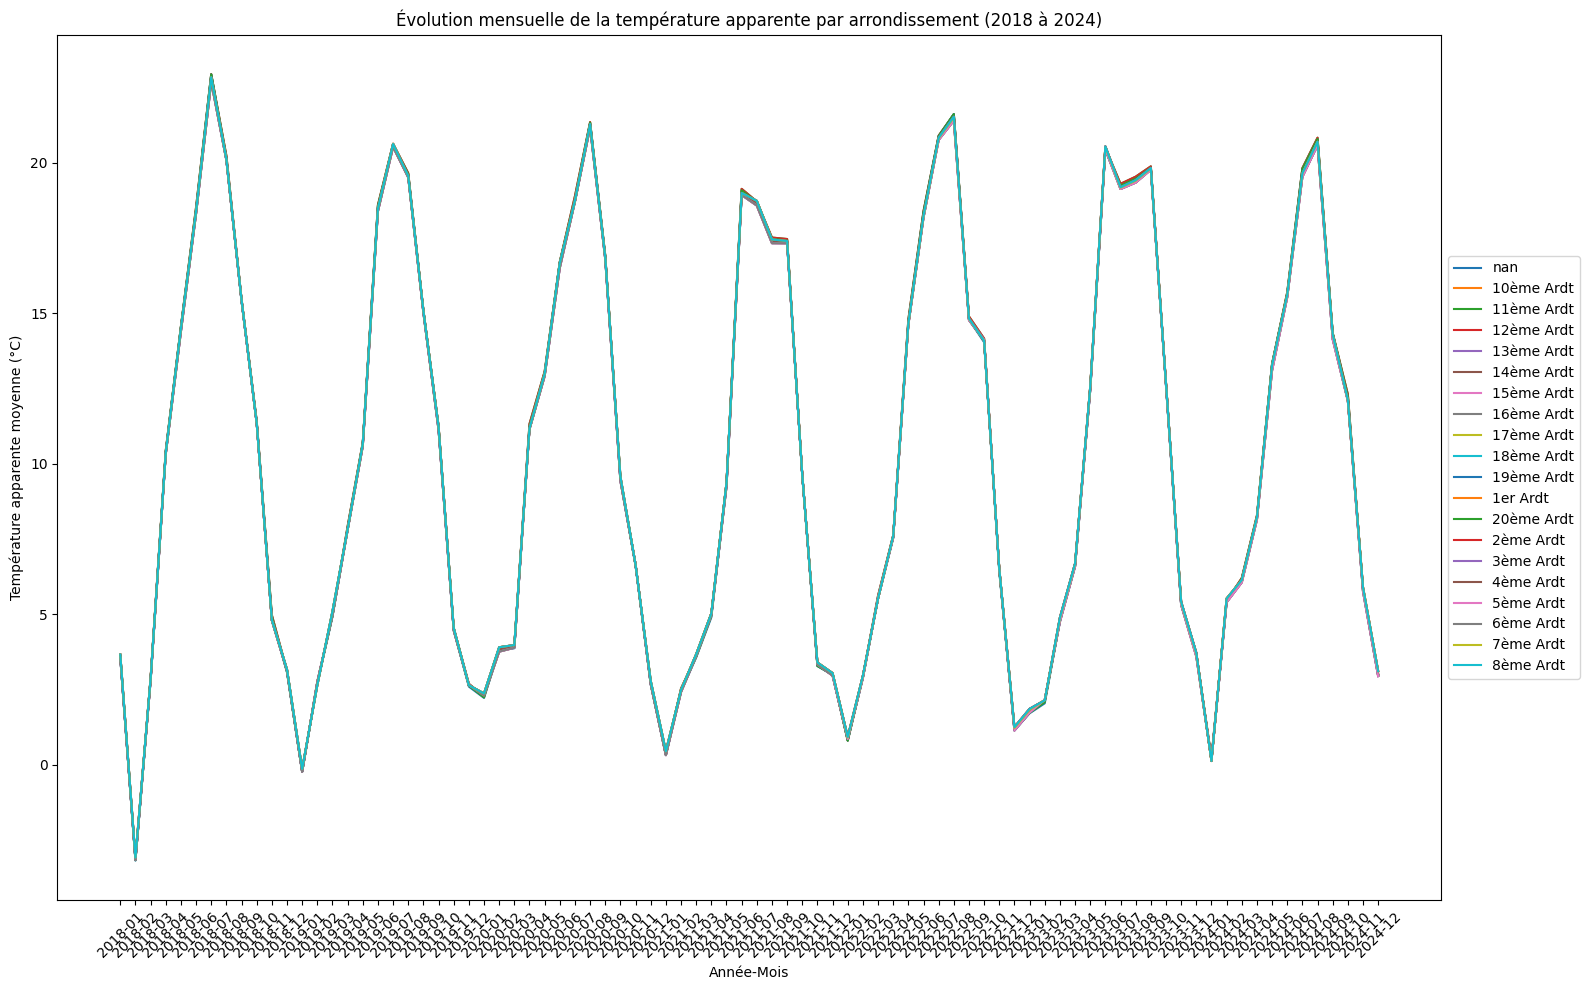

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#  Utilisation du DataFrame avec les arrondissements non manquants : df_temp

df_temp["annee_mois"] = df_temp["datetime"].dt.to_period("M")

# Calcul de la moyenne mensuelle de température par arrondissement
df_mensuel = (
    df_temp.groupby(["arrondissement", "annee_mois"], dropna=False)
           .agg(moyenne_temp_apparente=("temperature_apparente", "mean"))
           .reset_index()
)

# Conversion annee_mois en string pour affichage + tri
df_mensuel["annee_mois"] = df_mensuel["annee_mois"].astype(str)
df_mensuel = df_mensuel.sort_values(by=["arrondissement", "annee_mois"]).reset_index(drop=True)

print(df_mensuel.head())

# Pivot pour graphique : index = mois, colonnes = arrondissement
df_plot = df_mensuel.pivot(index="annee_mois", columns="arrondissement", values="moyenne_temp_apparente")

# Tracé
plt.figure(figsize=(16, 10))
for arr in df_plot.columns:
    plt.plot(df_plot.index, df_plot[arr], label=arr)

plt.title("Évolution mensuelle de la température apparente par arrondissement (2018 à 2024)")
plt.xlabel("Année-Mois")
plt.ylabel("Température apparente moyenne (°C)")
plt.xticks(rotation=45)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


Ce graphe montre que les différences de température entre les arrondissements sont minimes. 
De manière simplificatrice et a posteriori il est possible de dire qu'un seul arrondissement, voire un seul point auraient suffit pour tracer l'évolution de la température apparente à Paris de 2018 à 2024. 
Néanmoins, il aurait été peut-être imprudent (et contre-intuitif) de partir
avec cette hypothèse de départ. 
En outre, cette granularité des données nous sera peut-être utile dans la construction de notre modèle statistique


  arrondissement annee_mois  moyenne_precip_mm
0     10ème Ardt    2018-01           0.164919
1     10ème Ardt    2018-02           0.090030
2     10ème Ardt    2018-03           0.123925
3     10ème Ardt    2018-04           0.105278
4     10ème Ardt    2018-05           0.057661


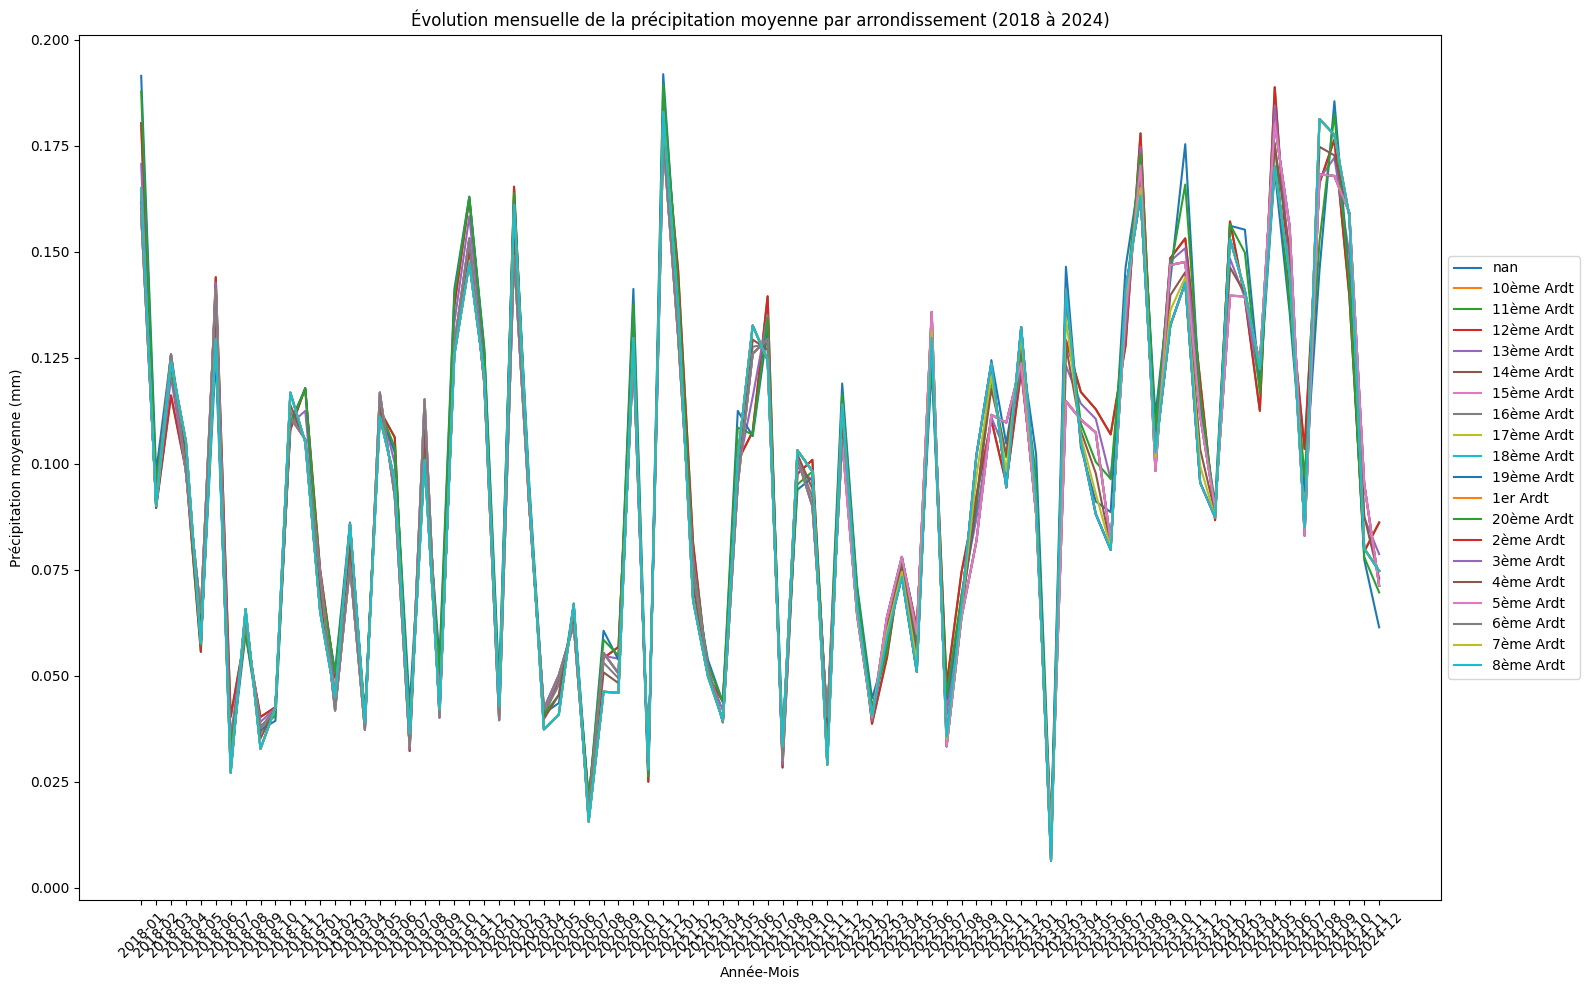

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Utilisation du DataFrame avec les arrondissements non manquants : df_precip

df_precip["annee_mois"] = df_precip["datetime"].dt.to_period("M")

# Calcul de la moyenne mensuelle des volumes de précipitations par arrondissement
df_mensuel = (
    df_precip.groupby(["arrondissement", "annee_mois"], dropna=False)
             .agg(moyenne_precip_mm=("precipitation_mm", "mean"))
             .reset_index()
)

# Conversion annee_mois en string pour affichage + tri
df_mensuel["annee_mois"] = df_mensuel["annee_mois"].astype(str)
df_mensuel = df_mensuel.sort_values(by=["arrondissement", "annee_mois"]).reset_index(drop=True)

print(df_mensuel.head())

# Pivot pour graphique : index = mois, colonnes = arrondissement
df_plot = df_mensuel.pivot(index="annee_mois", columns="arrondissement", values="moyenne_precip_mm")

# Tracé
plt.figure(figsize=(16, 10))
for arr in df_plot.columns:
    plt.plot(df_plot.index, df_plot[arr], label=arr)

plt.title("Évolution mensuelle de la précipitation moyenne par arrondissement (2018 à 2024)")
plt.xlabel("Année-Mois")
plt.ylabel("Précipitation moyenne (mm)")
plt.xticks(rotation=45)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


A la différence des moyennes mensuelles de températures par arrondissement qui variaient très peu, il semble y avoir de légères différences entre arrondissements (il n'y a pas une ligne d'une seule couleur qui écrase toutes les autres).
Cette observation a une certaine validité "empirique" (il est possible qu'il pleuve dans un arrondissement parisien et pas dans un autre).
Nous verrons lors de la construction du modèle statistique, quel est l'impact de cette relative disparité sur la circulation de vélos.

  arrondissement annee_mois  moyenne_cloud_cover_pct
0     10ème Ardt    2018-01                86.162634
1     10ème Ardt    2018-02                56.281250
2     10ème Ardt    2018-03                77.618280
3     10ème Ardt    2018-04                65.911111
4     10ème Ardt    2018-05                51.079301


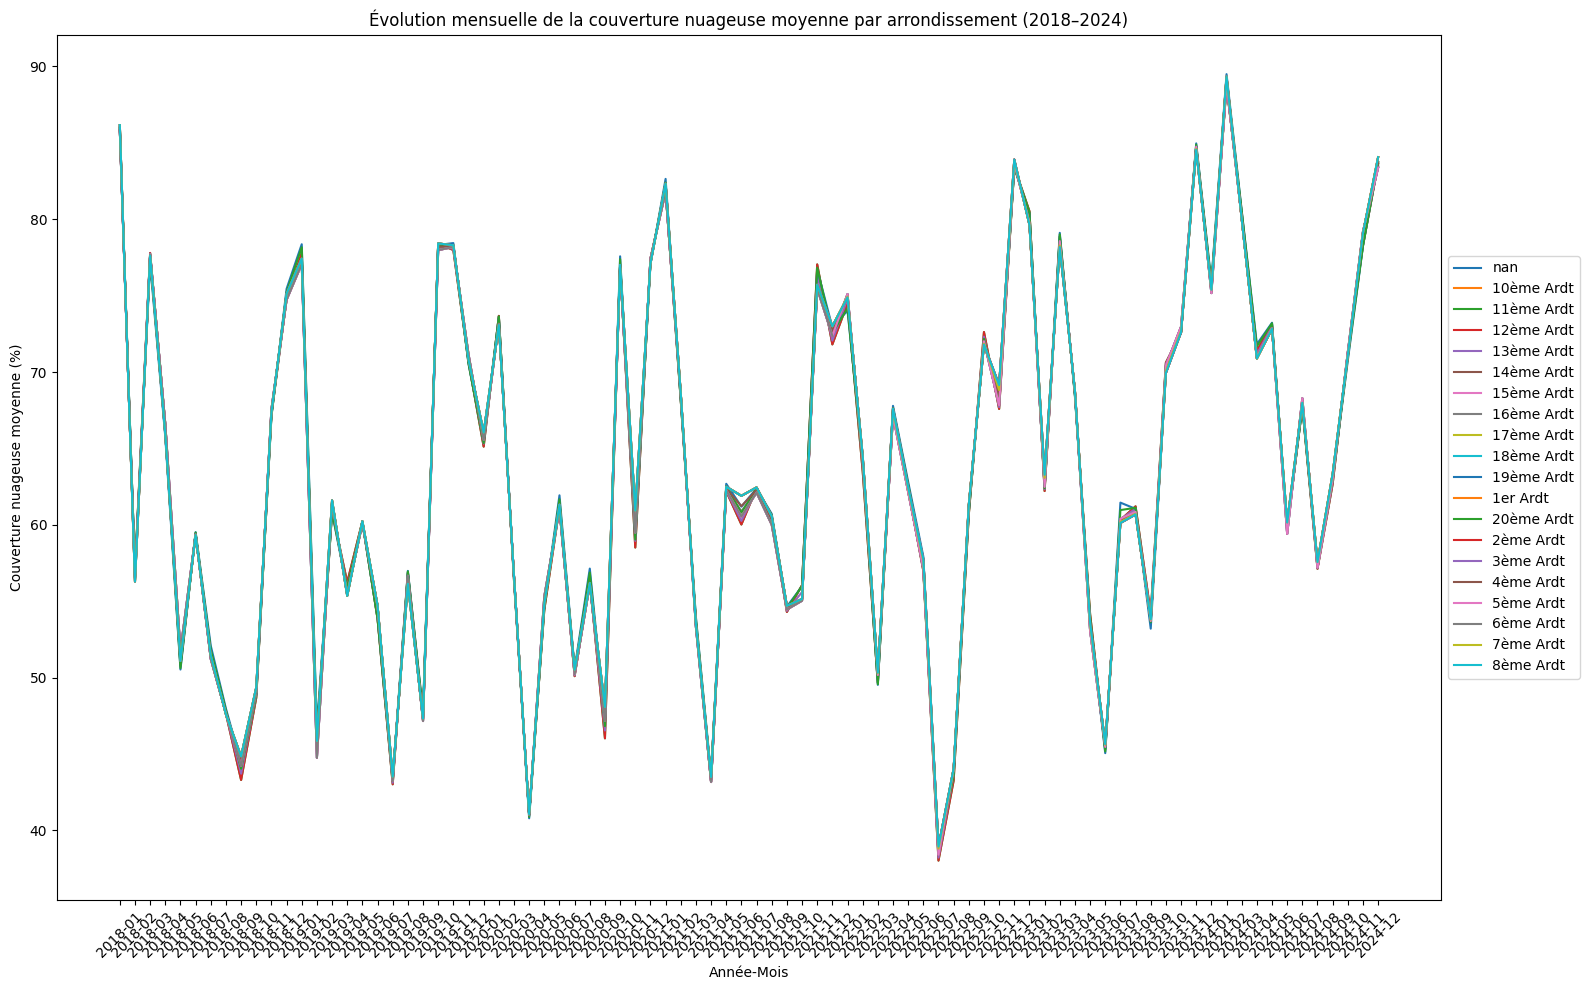

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Utilisation du DataFrame avec les arrondissements non manquants : df_cloud

df_cloud["annee_mois"] = df_cloud["datetime"].dt.to_period("M")

# Calcul de la moyenne mensuelle de cloudcover par arrondissement
df_mensuel = (
    df_cloud.groupby(["arrondissement", "annee_mois"], dropna=False)
            .agg(moyenne_cloud_cover_pct=("cloudcover_pct", "mean"))
            .reset_index()
)

# Conversion annee_mois en string pour affichage + tri
df_mensuel["annee_mois"] = df_mensuel["annee_mois"].astype(str)
df_mensuel = df_mensuel.sort_values(by=["arrondissement", "annee_mois"]).reset_index(drop=True)

print(df_mensuel.head())

# Pivot pour graphique : index = mois, colonnes = arrondissement
df_plot = df_mensuel.pivot(index="annee_mois", columns="arrondissement", values="moyenne_cloud_cover_pct")

# Tracé
plt.figure(figsize=(16, 10))
for arr in df_plot.columns:
    plt.plot(df_plot.index, df_plot[arr], label=arr)

plt.title("Évolution mensuelle de la couverture nuageuse moyenne par arrondissement (2018–2024)")
plt.xlabel("Année-Mois")
plt.ylabel("Couverture nuageuse moyenne (%)")
plt.xticks(rotation=45)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


Comme pour la température apparente, il y a très peu de différences entre les arrondissements pour la couverture nuageuse mensuelle moyenne.

## Conclusion  : 

En nous appuyant sur les données de comptage de vélos par sites de comptage nous sommes parvenus à identifier, pour chaque année, la liste des sites de comptage avec leur arrondissement correspondant. Par la suite nous avons collecté les données météorologiques de ces trois variables via l'API historique du site Open-Meteo, pour chaque heure de l'année, pour chaque site de comptage. La visualisation des courbes d'évolution de ces trois variables a permis de montrer que les différences entre les arrondissements étaient faibles, à l'exception des moyennes mensuelles des volumes de précipitations. La granularité des données pourrait néanmoins s'avérer utile lors de la régression linéaire.